## Use the same $\beta$

In [30]:
dirFile <- "/Users/hoang/Documents/SaveDataFromServer/SimulatedData/TestOutDataCC/"

fileN0 <- dir(dirFile, "RData$")
head(fileN0)

[1] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior.RlowerGamma.0.2000.18_39_Jun_04_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.03.rhocC.0.114706.RData" 
[2] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior.RlowerGamma.0.2000.18_39_Jun_04_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.03.rhocC.0.1480891.RData"
[3] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior.RlowerGamma.0.2000.18_39_Jun_04_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.05.rhocC.0.114706.RData" 
[4] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior.RlowerGamma.0.2000.18_39_Jun_04_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.05.rhocC.0.1480891.RData"
[5] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior.RlowerGamma.0.2000.18_39_Jun_04_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.07.rhocC.0.114706.RData" 
[6] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior.RlowerGamma.0.2000.18_39_Jun_04_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.07.rhocC.0.1480891.RData"

In [31]:
library("coda"); library("rstan")
kk = 1

tName <- c("GammaPrior.RlowerGamma.0.", "GammaPrior.RlowerGamma.1", "GammaPrior.RlowerGamma.0.5",
          "NormalPrior.RlowerGamma.0.", "NormalPrior.RlowerGamma.1.", "NormalPrior.RlowerGamma.0.5")

allOutData <- NULL

outTable <- NULL

for (tt in tName){
    fileN <- fileN0[grep(tt, fileN0)]
    outData <- NULL
    NN <- length(fileN)
#NN <- 50
for (kk in 1:NN) {
load(paste0(dirFile, fileN[kk]))
b1 <- as.data.frame( testFitSingleCC)
bMCMC <- mcmc(b1)
bHPD <-  HPDinterval(bMCMC)
medianHPD <- NULL

for (ii in 1:dim(bHPD)[1]){
        t1 <- b1[, ii]
            t2 <- t1[(t1>=bHPD[ii, 1]) & (t1<=bHPD[ii, 2])]
            medianHPD[ii] <- mean(t2)
}
names(medianHPD) <- colnames(b1)
outData <- rbind(outData, c(pi0, gammaMean, betaCC, medianHPD))
    
    
}
    tempCor <- tt
    for (i1 in 1:3) 
        tempCor <- c(tempCor, cor(outData[, i1], outData[, i1 + 3]))
    outTable <- rbind(outTable, tempCor)

    allOutData[[tt]] <- outData
    }

for (j1 in 1:3)
 print(cor(outData[, j1], outData[, j1 + 3]))


Warning message:
In cor(outData[, i1], outData[, i1 + 3]): the standard deviation is zeroWarning message:
In cor(outData[, i1], outData[, i1 + 3]): the standard deviation is zeroWarning message:
In cor(outData[, i1], outData[, i1 + 3]): the standard deviation is zeroWarning message:
In cor(outData[, i1], outData[, i1 + 3]): the standard deviation is zeroWarning message:
In cor(outData[, i1], outData[, i1 + 3]): the standard deviation is zeroWarning message:
In cor(outData[, i1], outData[, i1 + 3]): the standard deviation is zero

[1] 0.5595717
[1] 0.7859376


Warning message:
In cor(outData[, j1], outData[, j1 + 3]): the standard deviation is zero

[1] NA


In [32]:
allOutData1 <- lapply(allOutData, function(x) apply(x, 2, function(y) round(y, 3)))
    outTable0 <- outTable
   # outTable0

In [33]:
lapply(allOutData1, head)
lapply(allOutData1, tail)
lowerHyperGamma

$GammaPrior.RlowerGamma.0.
                  pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 4 0.004               0.753          3.999  -2612882
[2,] 0.03 1.3 4 0.013               1.990          4.001 -12896064
[3,] 0.05 1.3 4 0.019               2.038          4.000  -2622973
[4,] 0.05 1.3 4 0.020               1.983          4.000 -12863493
[5,] 0.07 1.3 4 0.027               2.056          4.000  -2594402
[6,] 0.07 1.3 4 0.011               0.768          4.001 -12668454

$GammaPrior.RlowerGamma.1
                  pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 4 0.013               2.020          4.001  -2600418
[2,] 0.03 1.3 4 0.012               2.001          3.999 -12815532
[3,] 0.05 1.3 4 0.021               1.981          4.000  -2516645
[4,] 0.05 1.3 4 0.018               2.001          4.001 -12760467
[5,] 0.07 1.3 4 0.025               2.103          4.001  -2570679
[6,] 0.07 1.3 4 0.027               2.026          4.000 -12867876

$GammaPrior.RlowerGamma.0.5
                  pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 4 0.005               0.872          4.000  -2678976
[2,] 0.03 1.3 4 0.004               0.904          4.000 -12940580
[3,] 0.05 1.3 4 0.008               0.890          4.001  -2590226
[4,] 0.05 1.3 4 0.008               0.893          4.001 -12814651
[5,] 0.07 1.3 4 0.010               0.912          4.000  -2652253
[6,] 0.07 1.3 4 0.026               2.021          4.000 -12522567

$NormalPrior.RlowerGamma.0.
                  pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 4 0.005               0.902          4.000  -2526248
[2,] 0.03 1.3 4 0.011               2.269          4.001 -13075844
[3,] 0.05 1.3 4 0.018               2.344          4.000  -2541068
[4,] 0.05 1.3 4 0.018               2.456          4.001 -12820912
[5,] 0.07 1.3 4 0.011               0.867          4.000  -2728046
[6,] 0.07 1.3 4 0.011               0.888          4.000 -12719974

$NormalPrior.RlowerGamma.1.
                  pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 4 0.011               2.458          4.000  -2671797
[2,] 0.03 1.3 4 0.011               2.421          4.001 -12914820
[3,] 0.05 1.3 4 0.018               2.383          4.000  -2703869
[4,] 0.05 1.3 4 0.020               2.350          3.999 -12905670
[5,] 0.07 1.3 4 0.029               2.414          4.000  -2538677
[6,] 0.07 1.3 4 0.028               2.272          4.000 -12733921

$NormalPrior.RlowerGamma.0.5
                  pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 4 0.005               0.905          3.999  -2589011
[2,] 0.03 1.3 4 0.011               2.279          4.000 -13011819
[3,] 0.05 1.3 4 0.018               2.288          4.000  -2555205
[4,] 0.05 1.3 4 0.019               2.482          4.000 -12828965
[5,] 0.07 1.3 4 0.011               0.951          4.000  -2563977
[6,] 0.07 1.3 4 0.027               2.341          4.000 -12605720

$GammaPrior.RlowerGamma.0.
                  pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[190,] 0.05 4 4 0.053               4.067          3.999 -13027824
[191,] 0.07 4 4 0.069               3.960          3.999  -2567866
[192,] 0.07 4 4 0.066               3.983          4.000 -12761506
[193,] 0.09 4 4 0.088               3.917          4.000  -2559091
[194,] 0.11 4 4 0.109               3.998          4.000  -2553285
[195,] 0.11 4 4 0.109               3.933          4.000 -12314450

$GammaPrior.RlowerGamma.1
                  pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[95,]  0.07 4 4 0.070               4.072          4.000  -2603201
[96,]  0.07 4 4 0.072               3.958          3.999 -12578374
[97,]  0.09 4 4 0.092               3.870          4.000  -2555857
[98,]  0.09 4 4 0.090               3.980          4.000 -12468929
[99,]  0.11 4 4 0.107               3.977          4.001  -2502468
[100,] 0.11 4 4 0.109               4.051          4.000 -12446156

$GammaPrior.RlowerGamma.0.5
                 pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[93,] 0.05 4 4 0.053               4.067          3.999 -13027824
[94,] 0.07 4 4 0.069               3.960          3.999  -2567866
[95,] 0.07 4 4 0.066               3.983          4.000 -12761506
[96,] 0.09 4 4 0.088               3.917          4.000  -2559091
[97,] 0.11 4 4 0.109               3.998          4.000  -2553285
[98,] 0.11 4 4 0.109               3.933          4.000 -12314450

$NormalPrior.RlowerGamma.0.
                  pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[154,] 0.03 4 4 0.027               4.745          4.000  -2632375
[155,] 0.05 4 4 0.048               4.641          4.000 -12833092
[156,] 0.07 4 4 0.070               4.715          4.000  -2556378
[157,] 0.07 4 4 0.068               4.636          4.001 -12580406
[158,] 0.11 4 4 0.108               4.852          4.000  -2491958
[159,] 0.11 4 4 0.110               4.672          4.000 -12279274

$NormalPrior.RlowerGamma.1.
                 pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[78,] 0.03 4 4 0.030               4.634          4.001 -12778112
[79,] 0.05 4 4 0.053               4.856          4.000  -2604732
[80,] 0.05 4 4 0.050               4.661          3.999 -12660904
[81,] 0.09 4 4 0.090               4.656          4.001  -2517173
[82,] 0.09 4 4 0.089               4.728          4.000 -12445950
[83,] 0.11 4 4 0.114               4.540          4.000 -12388750

$NormalPrior.RlowerGamma.0.5
                 pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[77,] 0.03 4 4 0.027               4.745          4.000  -2632375
[78,] 0.05 4 4 0.048               4.641          4.000 -12833092
[79,] 0.07 4 4 0.070               4.715          4.000  -2556378
[80,] 0.07 4 4 0.068               4.636          4.001 -12580406
[81,] 0.11 4 4 0.108               4.852          4.000  -2491958
[82,] 0.11 4 4 0.110               4.672          4.000 -12279274

ERROR: Error in eval(expr, envir, enclos): object 'lowerHyperGamma' not found


NULL


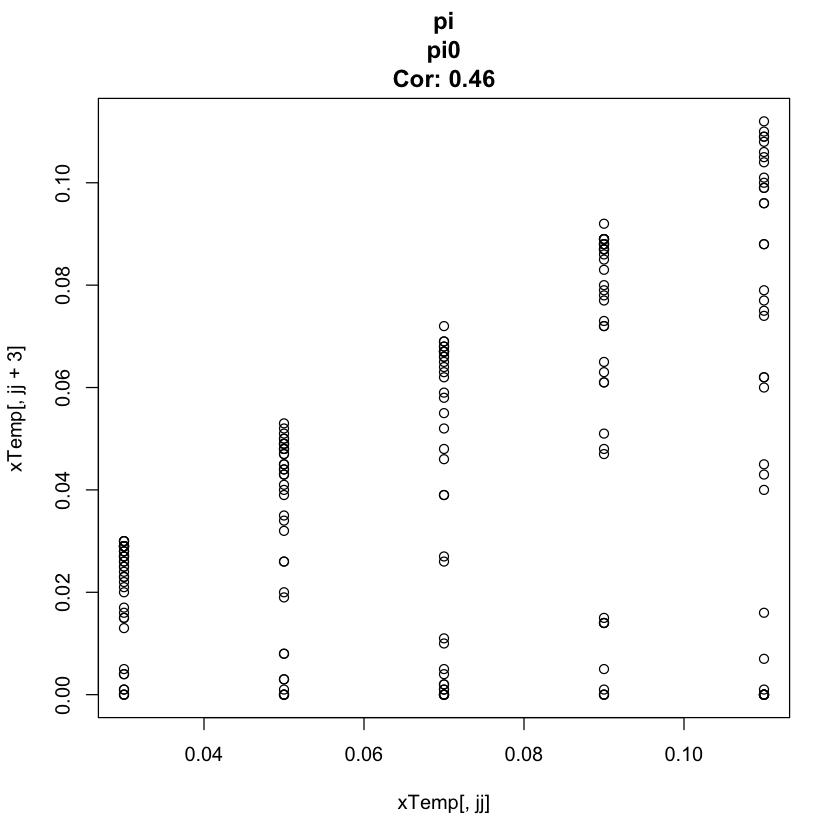

NULL


Warning message:
In cor(xTemp[, jj], xTemp[, jj + 3]): the standard deviation is zero

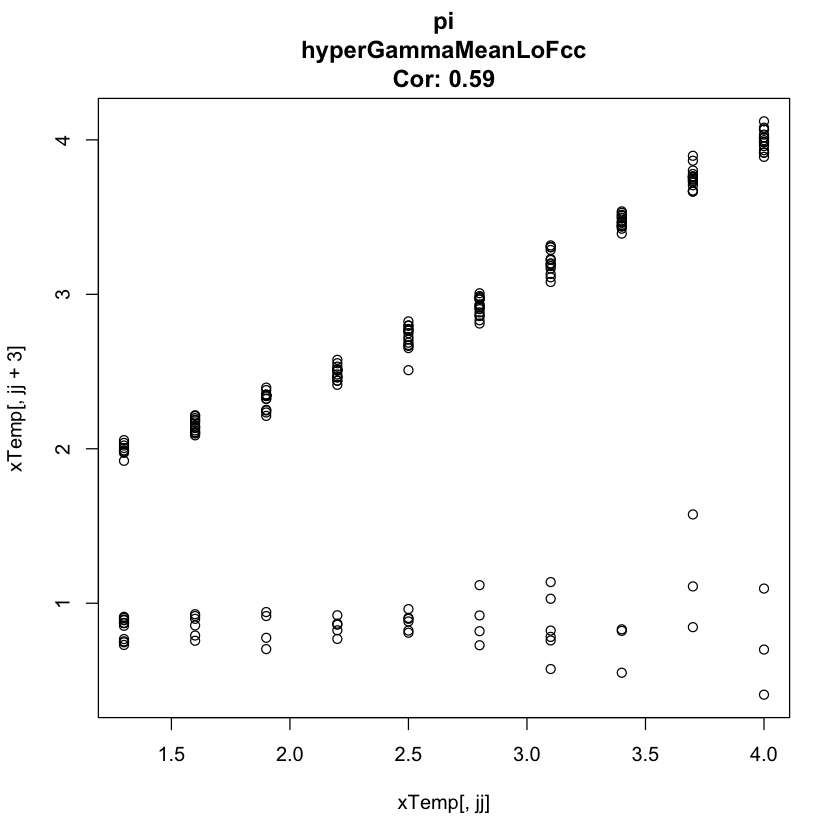

NULL


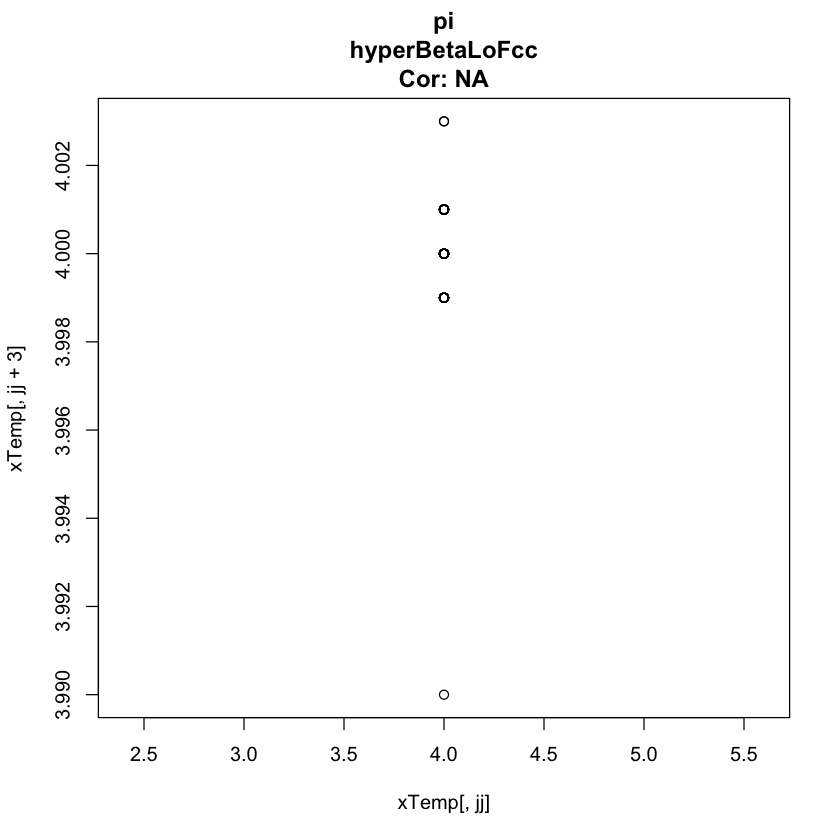

NULL


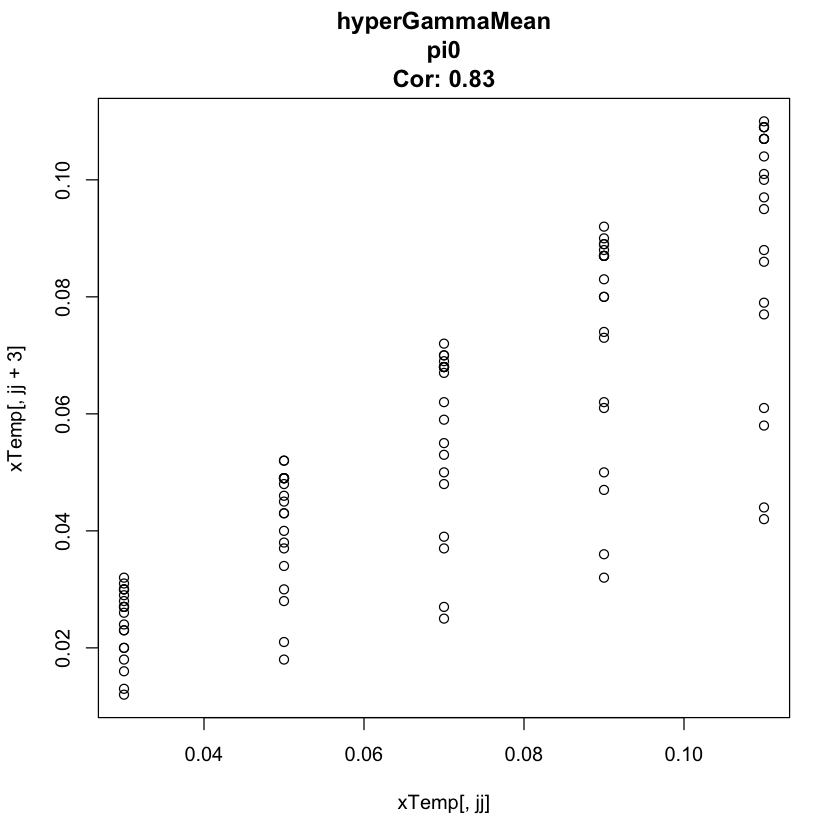

NULL


Warning message:
In cor(xTemp[, jj], xTemp[, jj + 3]): the standard deviation is zero

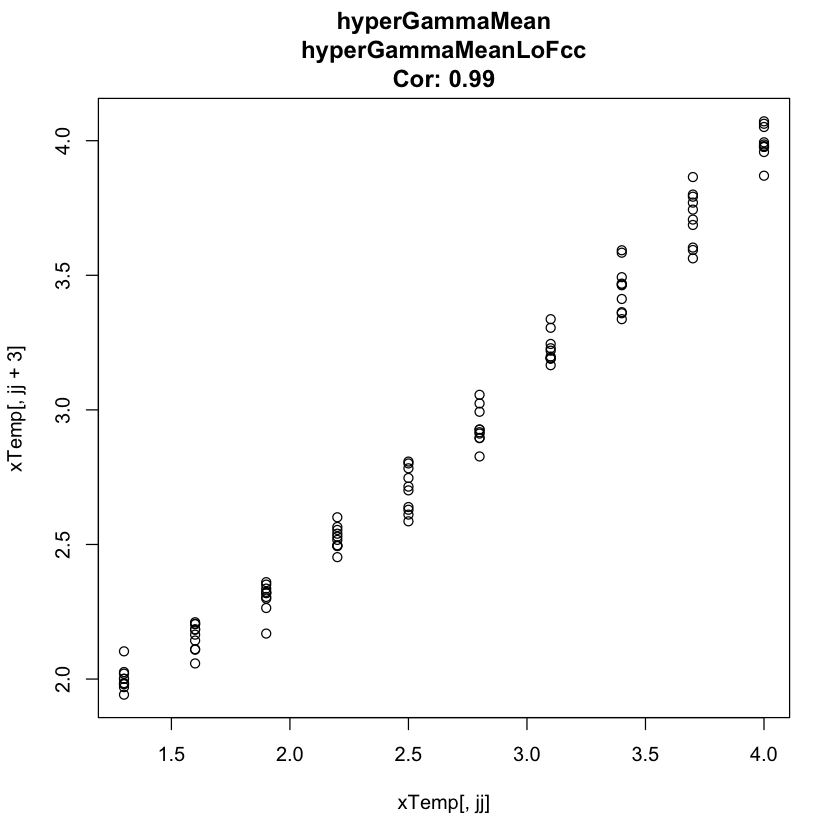

NULL


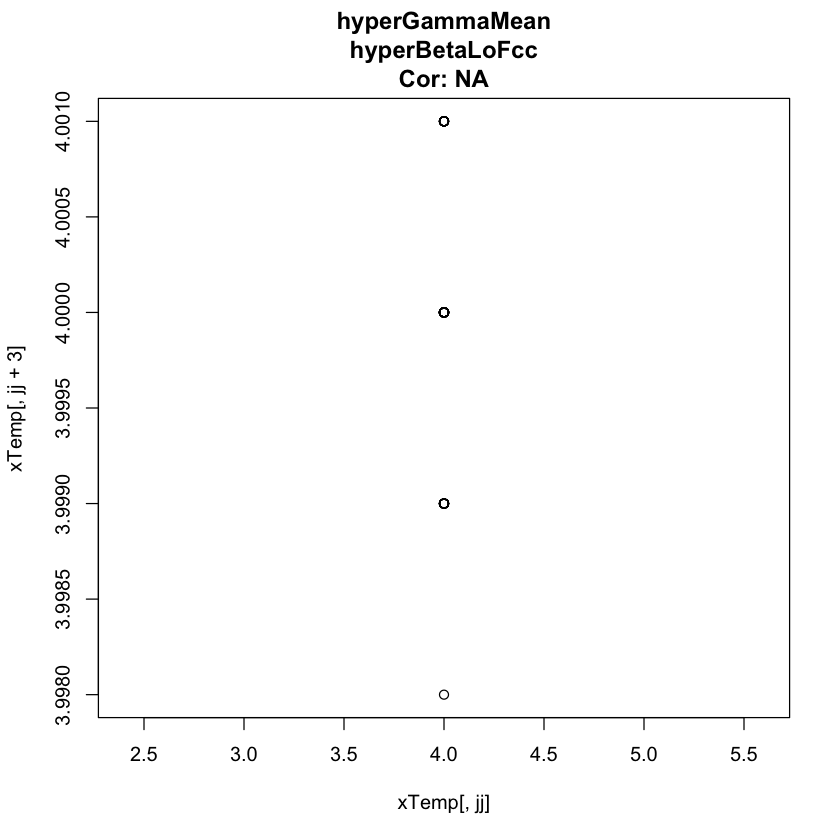

NULL


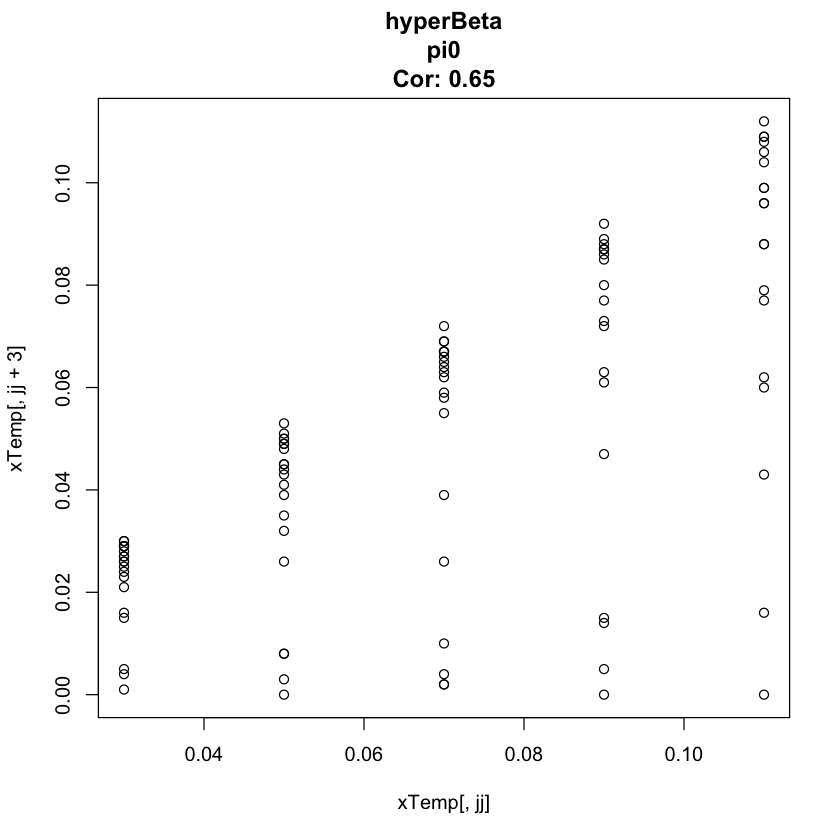

NULL


Warning message:
In cor(xTemp[, jj], xTemp[, jj + 3]): the standard deviation is zero

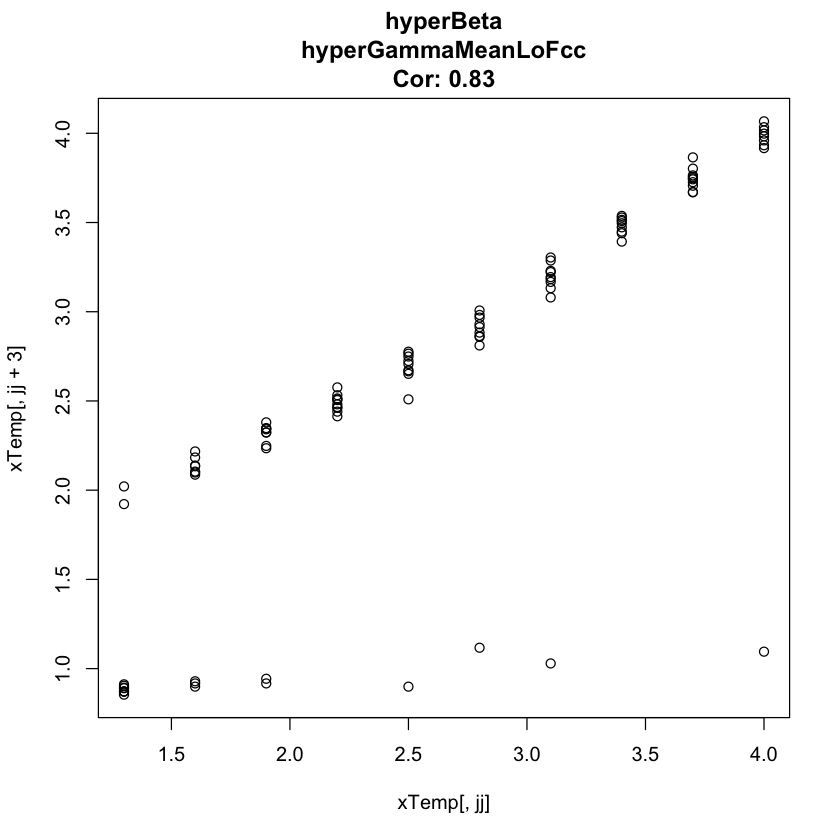

NULL


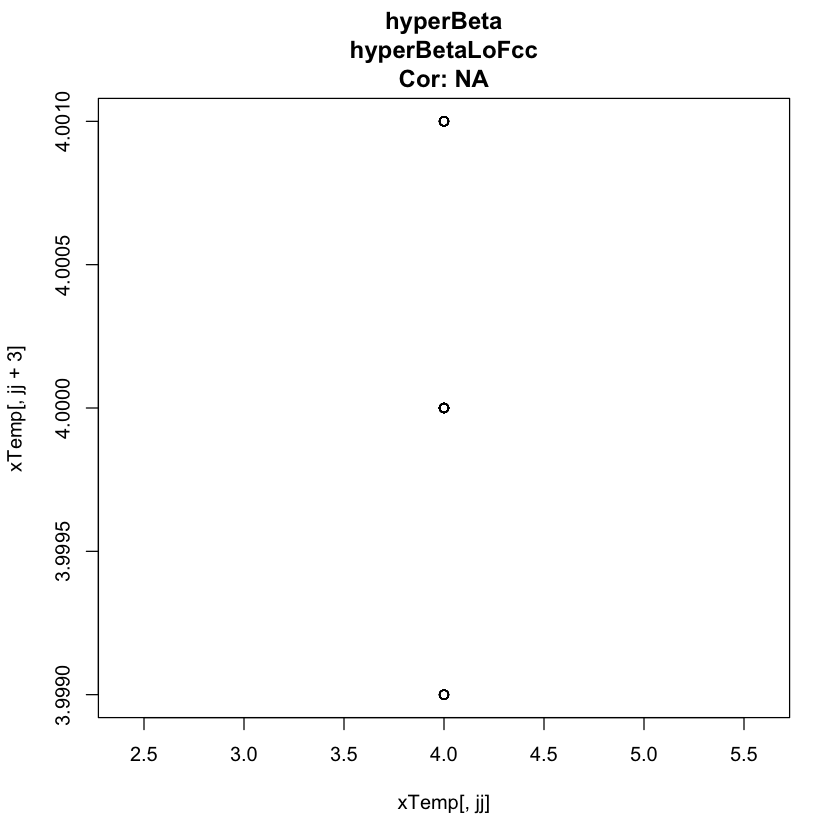

NULL


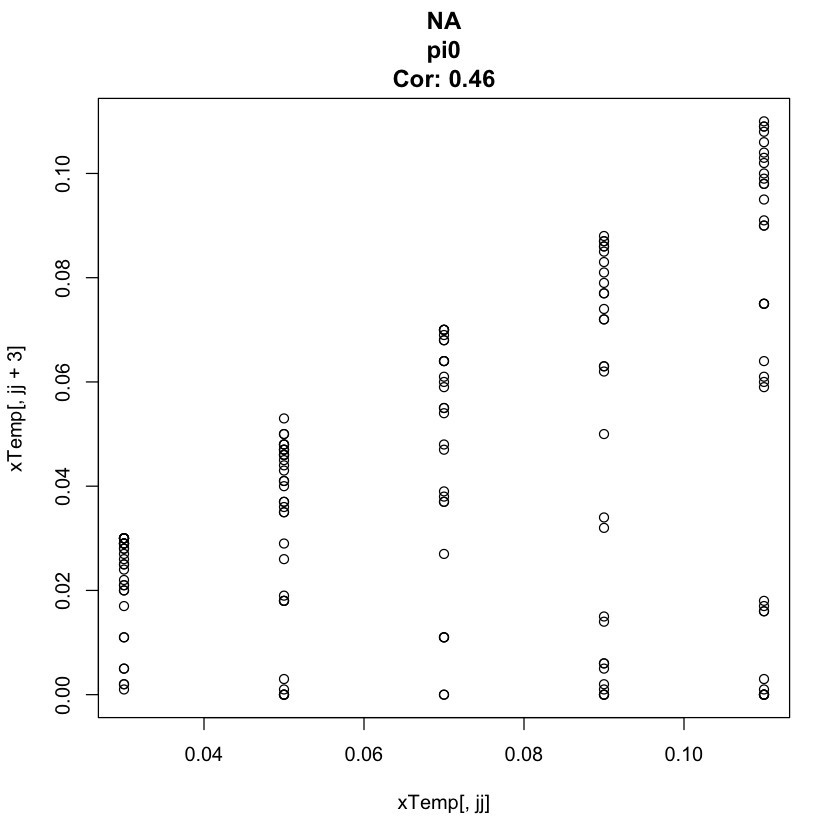

NULL


Warning message:
In cor(xTemp[, jj], xTemp[, jj + 3]): the standard deviation is zero

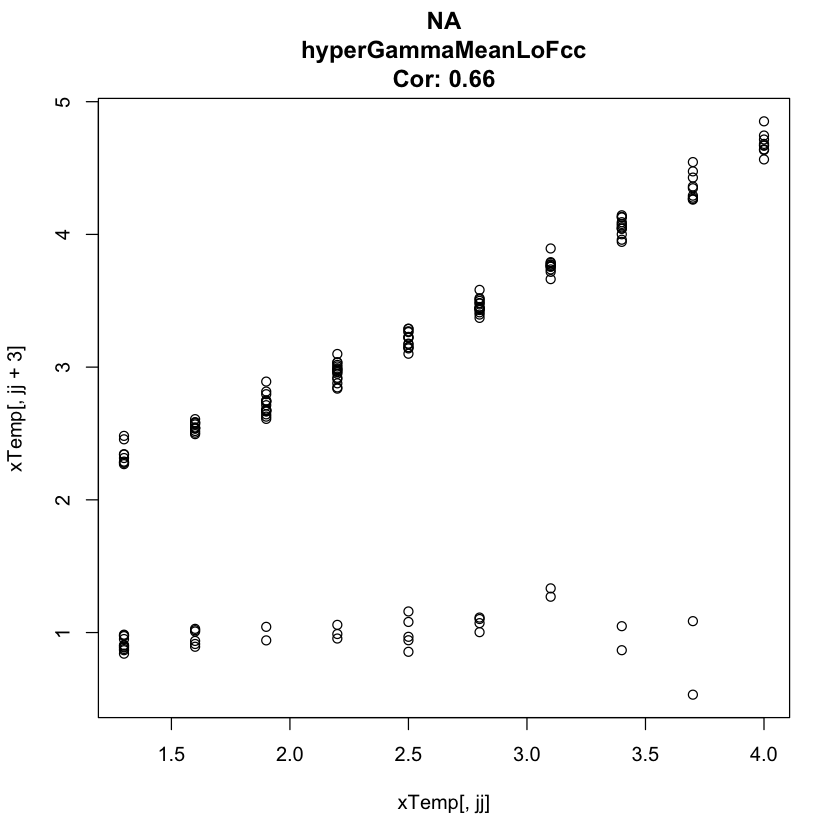

NULL


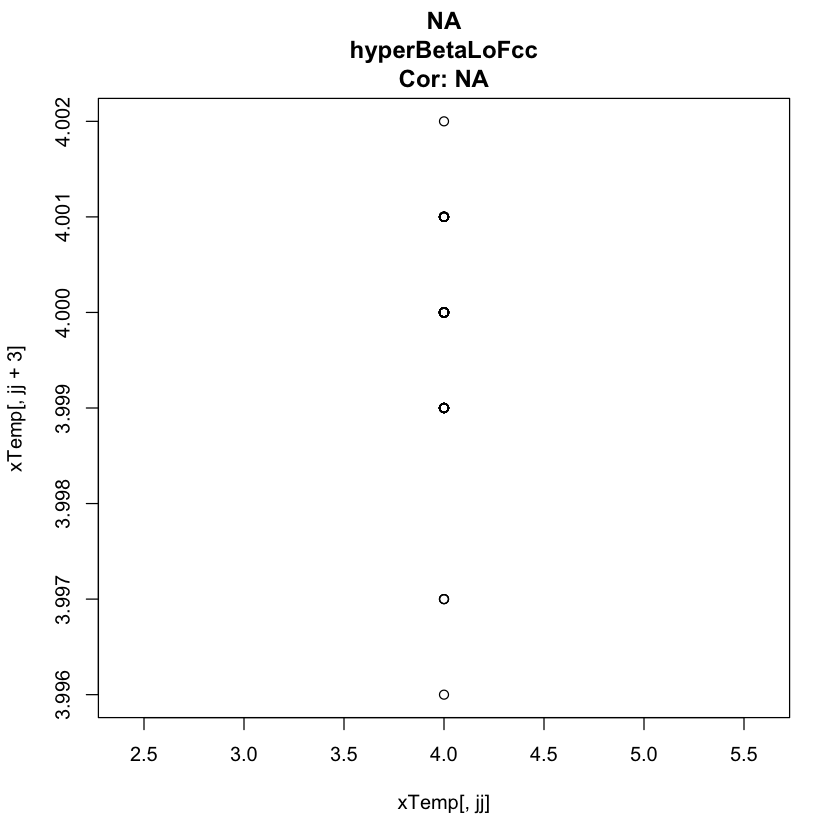

NULL


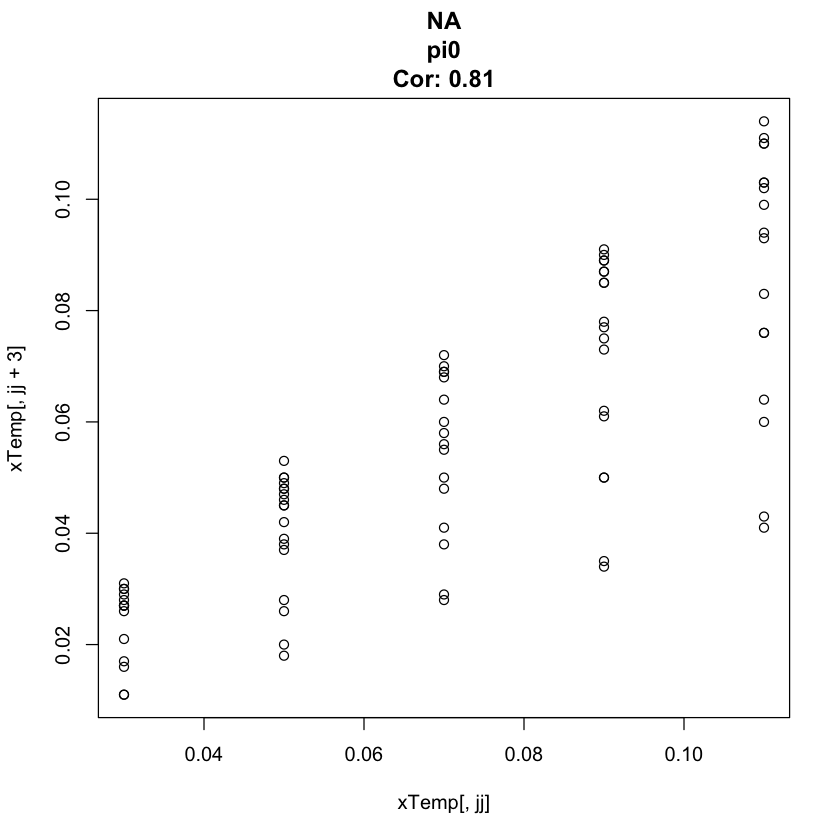

NULL


Warning message:
In cor(xTemp[, jj], xTemp[, jj + 3]): the standard deviation is zero

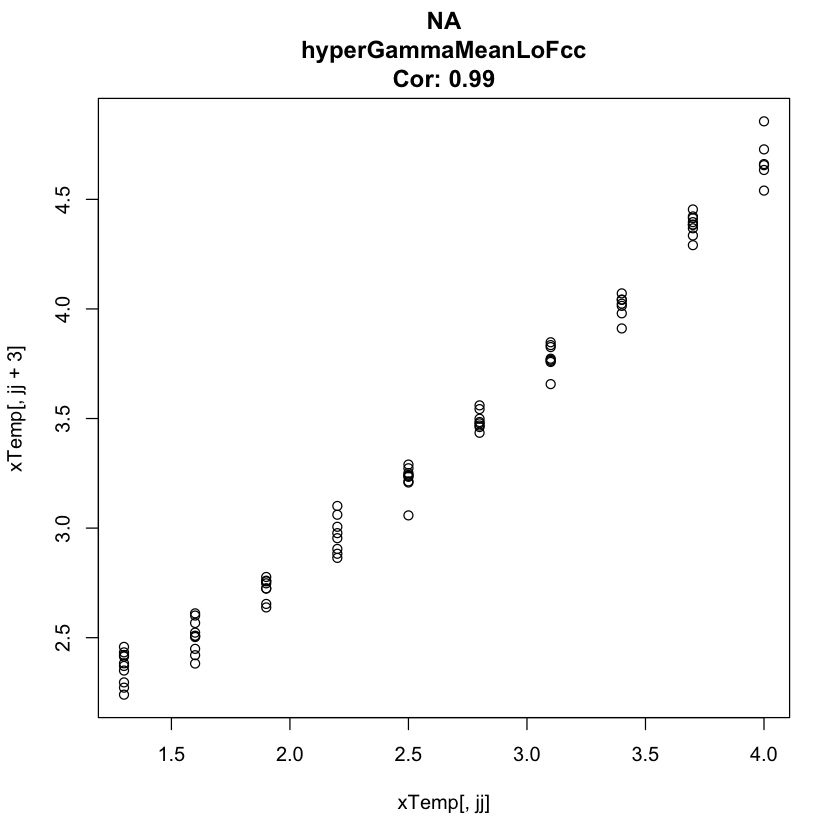

NULL


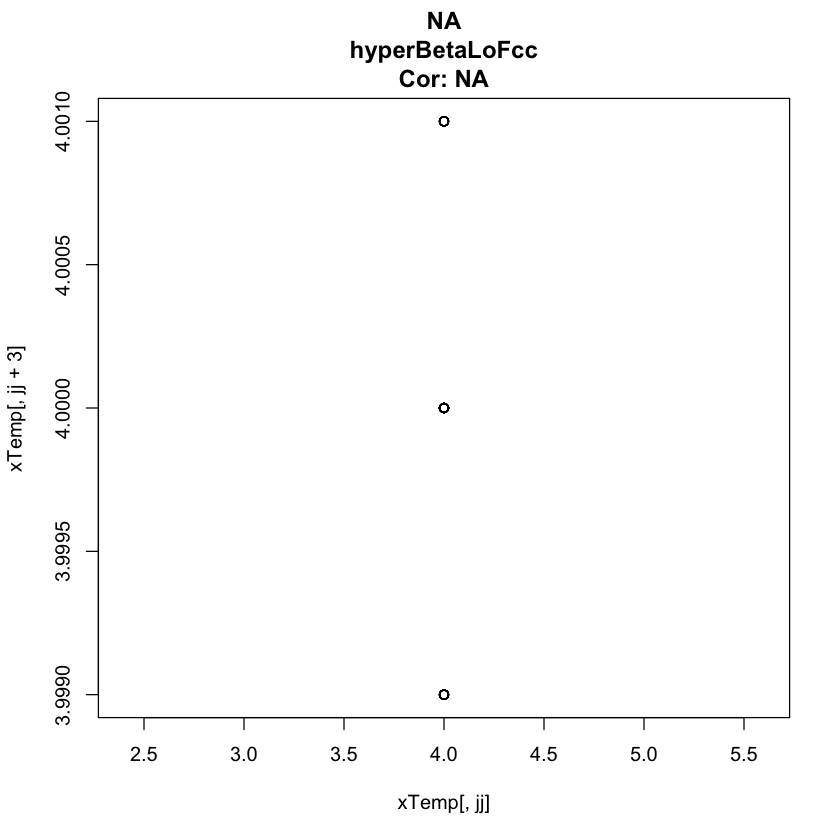

NULL


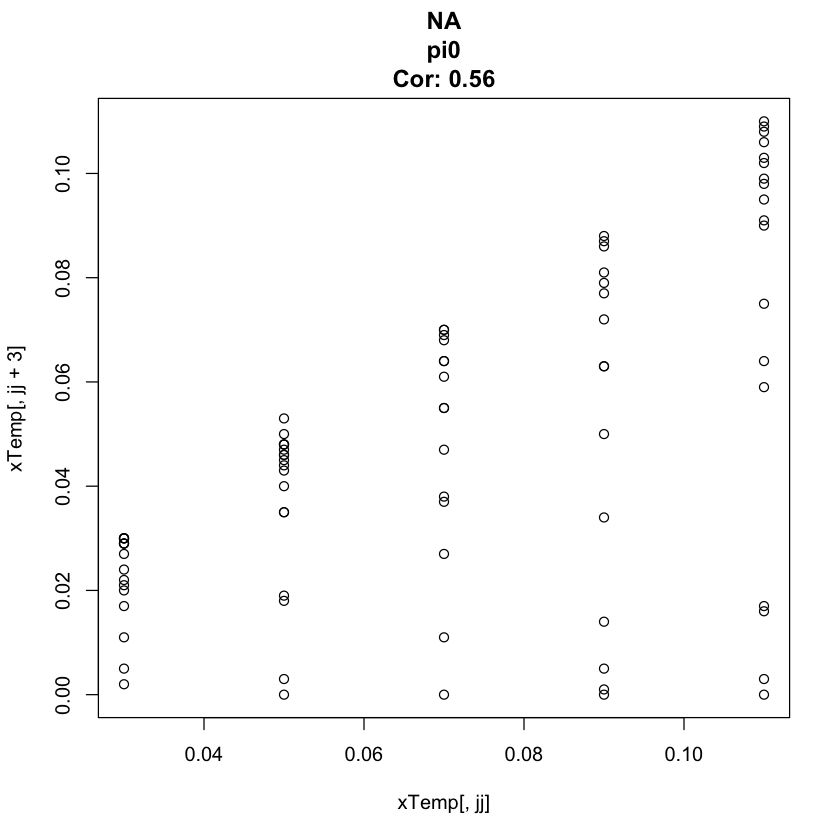

NULL


Warning message:
In cor(xTemp[, jj], xTemp[, jj + 3]): the standard deviation is zero

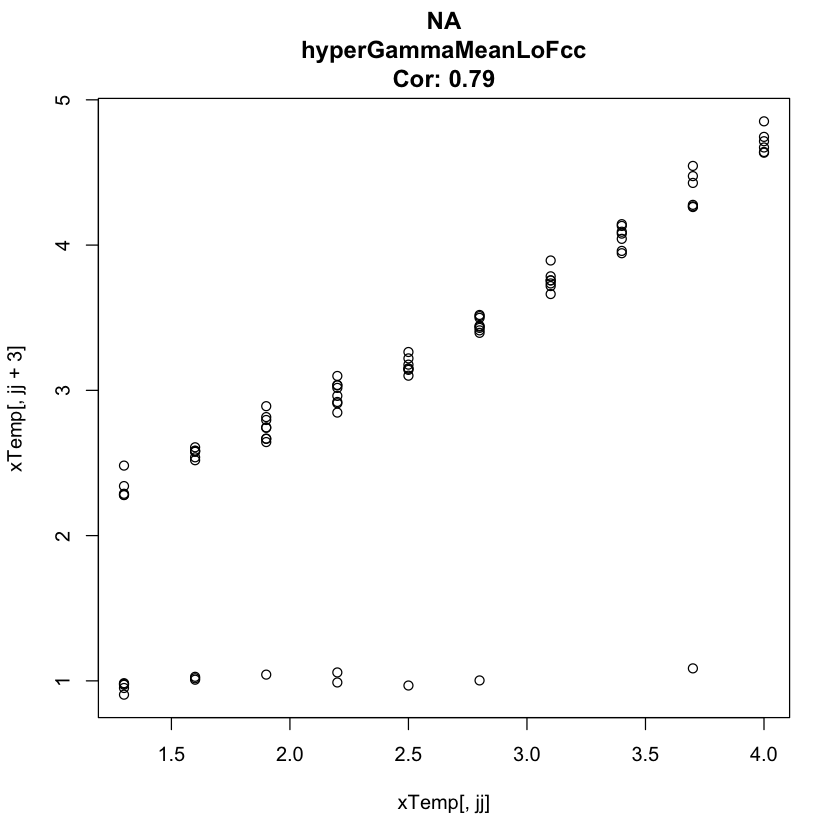

NULL


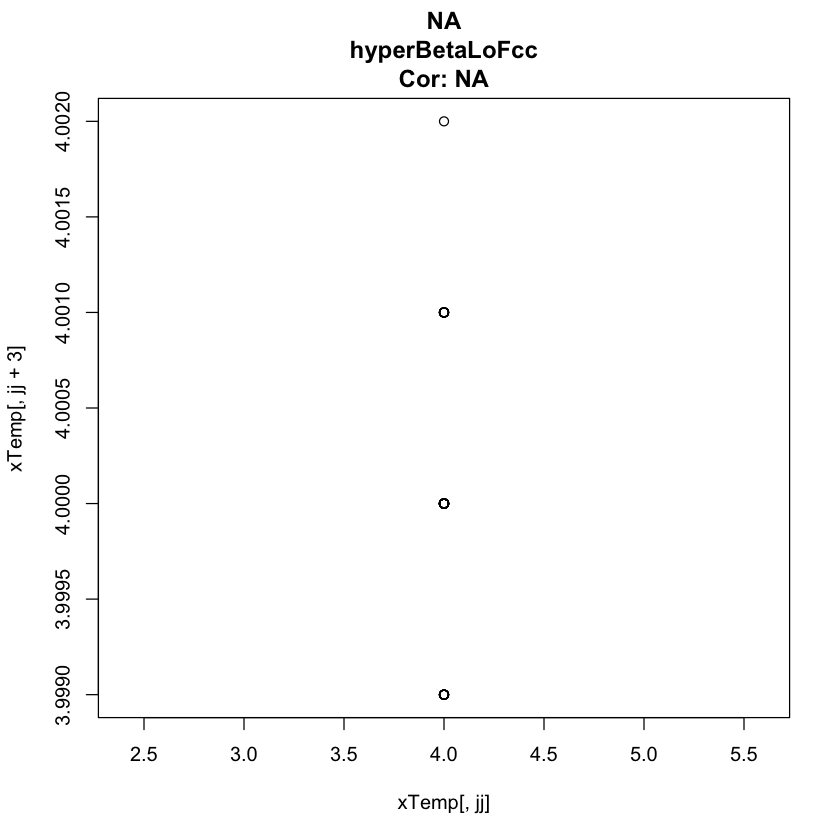

In [34]:
tName <- c("pi", "hyperGammaMean", "hyperBeta")
for (ii in 1:length(allOutData1)) {
    xTemp <- allOutData1[[ii]]
    for (jj in 1:3)
    print(plot(xTemp[, jj], xTemp[, jj + 3], 
              main = paste0(tName[ii], "\n",colnames(xTemp)[jj + 3], "\nCor: ",
                           round(cor(xTemp[, jj], xTemp[, jj + 3]), 2))))
}
#lapply(allOutData1, function(x){
 #   for (jj in 1:3)
  #      print(plot(x[, jj], x[, jj +3], 
   #                main = pcolnames(x)[jj + 3]))
#})

## Adjust $\beta$

In [35]:
dirFile <- "/Users/hoang/Documents/SaveDataFromServer/SimulatedData/TestOutDataCCadjustBeta/"

fileN0 <- dir(dirFile, "RData$")
head(fileN0)
library("coda"); library("rstan")
kk = 1



[1] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior_adjustBeta.R0.05.lowerGamma.0.5.5000.18_12_Jun_06_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.03.rhocC.0.114706.RData" 
[2] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior_adjustBeta.R0.05.lowerGamma.0.5.5000.18_12_Jun_06_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.03.rhocC.0.1480891.RData"
[3] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior_adjustBeta.R0.05.lowerGamma.0.5.5000.18_12_Jun_06_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.05.rhocC.0.114706.RData" 
[4] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior_adjustBeta.R0.05.lowerGamma.0.5.5000.18_12_Jun_06_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.05.rhocC.0.1480891.RData"
[5] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior_adjustBeta.R0.05.lowerGamma.0.5.5000.18_12_Jun_06_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.07.rhocC.0.114706.RData" 
[6] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseGammaPrior_adjustBeta.R0.05.lowerGamma.0.5.5000.18_12_Jun_06_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.07.rhocC.0.1480891.RData"

In [36]:
tName <- c("GammaPrior_adjustBeta.RlowerGamma.0.", "GammaPrior_adjustBeta.RlowerGamma.1", 
           "GammaPrior_adjustBeta.RlowerGamma.0.5",
          "NormalPrior_adjustBeta.RlowerGamma.0.", 
           "NormalPrior_adjustBeta.RlowerGamma.1.", "NormalPrior_adjustBeta.RlowerGamma.0.5")

allOutData <- NULL

outTable <- NULL

for (tt in tName){
    fileN <- fileN0[grep(tt, fileN0)]
    outData <- NULL
    NN <- length(fileN)
#NN <- 50
for (kk in 1:NN) {
load(paste0(dirFile, fileN[kk]))
b1 <- as.data.frame( testFitSingleCC)
bMCMC <- mcmc(b1)
bHPD <-  HPDinterval(bMCMC)
medianHPD <- NULL

for (ii in 1:dim(bHPD)[1]){
        t1 <- b1[, ii]
            t2 <- t1[(t1>=bHPD[ii, 1]) & (t1<=bHPD[ii, 2])]
            medianHPD[ii] <- mean(t2)
}
names(medianHPD) <- colnames(b1)
outData <- rbind(outData, c(pi0, gammaMean, betaCC, medianHPD))
}

    tempCor <- tt
    for (i1 in 1:3) 
        tempCor <- c(tempCor, cor(outData[, i1], outData[, i1 + 3]))
        outTable <- rbind(outTable, tempCor)

    allOutData[[tt]] <- outData
    }

for (j1 in 1:3)
 print(cor(outData[, j1], outData[, j1 + 3]))


[1] 0.1761086
[1] 0.386278
[1] -0.01274761


In [37]:
outTable1 <- outTable
outTable0 <- cbind(outTable0, rep(0, dim(outTable0)[1]))
outTable1 <- cbind(outTable1, rep(1, dim(outTable1)[1]))
outTableA <- rbind(outTable1, outTable0)

write.table(outTableA, "Table_result_simulationCaseControl_Only.txt",
           quote = FALSE, row.names  = FALSE)



In [38]:
allOutData1 <- lapply(allOutData, function(x) apply(x, 2, function(y) round(y, 3)))
    lapply(allOutData1, head)
lapply(allOutData1, tail)

$GammaPrior_adjustBeta.RlowerGamma.0.
                       pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 36.719 0.017               1.810         12.756  -2652447
[2,] 0.03 1.3 36.719 0.020               1.795         13.792 -12903162
[3,] 0.05 1.3 36.719 0.033               1.779         12.663  -2624830
[4,] 0.05 1.3 36.719 0.000               0.816      39996.710 -12902226
[5,] 0.07 1.3 36.719 0.047               1.738         14.009  -2544324
[6,] 0.03 1.3 36.719 0.000               2.181          5.019  -2575098

$GammaPrior_adjustBeta.RlowerGamma.1
                       pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 36.719 0.018               1.774         13.876  -2650473
[2,] 0.03 1.3 36.719 0.021               1.820         12.771 -12891356
[3,] 0.05 1.3 36.719 0.033               1.726         14.234  -2612382
[4,] 0.05 1.3 36.719 0.034               1.716         17.104 -12762089
[5,] 0.03 1.3 36.719 0.018               1.843         13.651  -2542193
[6,] 0.03 1.3 36.719 0.021               1.739         14.199 -12959324

$GammaPrior_adjustBeta.RlowerGamma.0.5
                       pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 36.719 0.000               2.181          5.019  -2575098
[2,] 0.03 1.3 36.719 0.019               1.758         15.886 -12935058
[3,] 0.05 1.3 36.719 0.032               1.722         15.049  -2413364
[4,] 0.05 1.3 36.719 0.031               1.725         14.995 -12753771
[5,] 0.03 1.3 36.719 0.019               1.718         14.911  -2525861
[6,] 0.03 1.3 36.719 0.000               2.163          4.814 -12923451

$NormalPrior_adjustBeta.RlowerGamma.0.
                       pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 36.719 0.019               2.398          8.477  -2672255
[2,] 0.03 1.3 36.719 0.020               2.339          8.630 -12867493
[3,] 0.05 1.3 36.719 0.035               2.402          7.423  -2603169
[4,] 0.05 1.3 36.719 0.034               2.528          6.515 -12808469
[5,] 0.07 1.3 36.719 0.045               2.532          6.292  -2483967
[6,] 0.07 1.3 36.719 0.000              15.145          1.082 -12681651

$NormalPrior_adjustBeta.RlowerGamma.1.
                       pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 36.719 0.000              14.947          1.082  -2545512
[2,] 0.03 1.3 36.719 0.020               2.450          7.720 -12836077
[3,] 0.05 1.3 36.719 0.032               2.414          6.744  -2483603
[4,] 0.05 1.3 36.719 0.033               2.336          9.020 -13008170
[5,] 0.07 1.3 36.719 0.047               2.394          7.768  -2524558
[6,] 0.07 1.3 36.719 0.046               2.417          7.373 -12617547

$NormalPrior_adjustBeta.RlowerGamma.0.5
                       pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 36.719 0.019               2.398          8.477  -2672255
[2,] 0.03 1.3 36.719 0.020               2.339          8.630 -12867493
[3,] 0.05 1.3 36.719 0.035               2.402          7.423  -2603169
[4,] 0.05 1.3 36.719 0.034               2.528          6.515 -12808469
[5,] 0.07 1.3 36.719 0.045               2.532          6.292  -2483967
[6,] 0.07 1.3 36.719 0.000              15.145          1.082 -12681651

$GammaPrior_adjustBeta.RlowerGamma.0.
                      pi0 hyperGammaMeanLoFcc hyperBetaLoFcc           lp__
[199,] 0.05 4 1.396 0.000               2.349   3.207000e+00  -1.379349e+07
[200,] 0.07 4 1.396 0.000               2.461   2.791000e+00  -3.673439e+06
[201,] 0.07 4 1.396 0.152               0.150  2.817501e+215 -1.861387e+215
[202,] 0.09 4 1.396 0.080               4.382   1.409000e+00  -2.553580e+06
[203,] 0.09 4 1.396 0.085               4.329   1.409000e+00  -1.266843e+07
[204,] 0.11 4 1.396 0.100               4.329   1.430000e+00  -2.544126e+06

$GammaPrior_adjustBeta.RlowerGamma.1
                      pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[99,]  0.07 4 1.396 0.064               4.246          1.446  -2583871
[100,] 0.07 4 1.396 0.064               4.415          1.406 -12595807
[101,] 0.09 4 1.396 0.081               4.416          1.403  -2581862
[102,] 0.09 4 1.396 0.081               4.396          1.409 -12522436
[103,] 0.11 4 1.396 0.101               4.573          1.378  -2656485
[104,] 0.11 4 1.396 0.102               4.367          1.409 -12351800

$GammaPrior_adjustBeta.RlowerGamma.0.5
                      pi0 hyperGammaMeanLoFcc hyperBetaLoFcc           lp__
[194,] 0.05 4 1.396 0.000               2.349   3.207000e+00  -1.379349e+07
[195,] 0.07 4 1.396 0.000               2.461   2.791000e+00  -3.673439e+06
[196,] 0.07 4 1.396 0.152               0.150  2.817501e+215 -1.861387e+215
[197,] 0.09 4 1.396 0.080               4.382   1.409000e+00  -2.553580e+06
[198,] 0.09 4 1.396 0.085               4.329   1.409000e+00  -1.266843e+07
[199,] 0.11 4 1.396 0.100               4.329   1.430000e+00  -2.544126e+06

$NormalPrior_adjustBeta.RlowerGamma.0.
                      pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[190,] 0.07 4 1.396 0.001               2.561          3.398  -3669925
[191,] 0.07 4 1.396 0.000               2.976          1.967 -14159564
[192,] 0.09 4 1.396 0.080               6.411          1.202  -2539336
[193,] 0.09 4 1.396 0.081               6.551          1.187 -12606897
[194,] 0.11 4 1.396 0.098               6.392          1.199  -2491400
[195,] 0.11 4 1.396 0.000               2.790          2.350 -14586307

$NormalPrior_adjustBeta.RlowerGamma.1.
                      pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[95,]  0.07 4 1.396 0.063               6.638          1.190  -2599589
[96,]  0.07 4 1.396 0.062               6.367          1.198 -12726491
[97,]  0.09 4 1.396 0.082               6.320          1.200  -2536446
[98,]  0.09 4 1.396 0.079               6.473          1.202 -12545590
[99,]  0.11 4 1.396 0.100               6.653          1.194  -2547914
[100,] 0.11 4 1.396 0.103               6.625          1.182 -12543576

$NormalPrior_adjustBeta.RlowerGamma.0.5
                      pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[190,] 0.07 4 1.396 0.001               2.561          3.398  -3669925
[191,] 0.07 4 1.396 0.000               2.976          1.967 -14159564
[192,] 0.09 4 1.396 0.080               6.411          1.202  -2539336
[193,] 0.09 4 1.396 0.081               6.551          1.187 -12606897
[194,] 0.11 4 1.396 0.098               6.392          1.199  -2491400
[195,] 0.11 4 1.396 0.000               2.790          2.350 -14586307

NULL


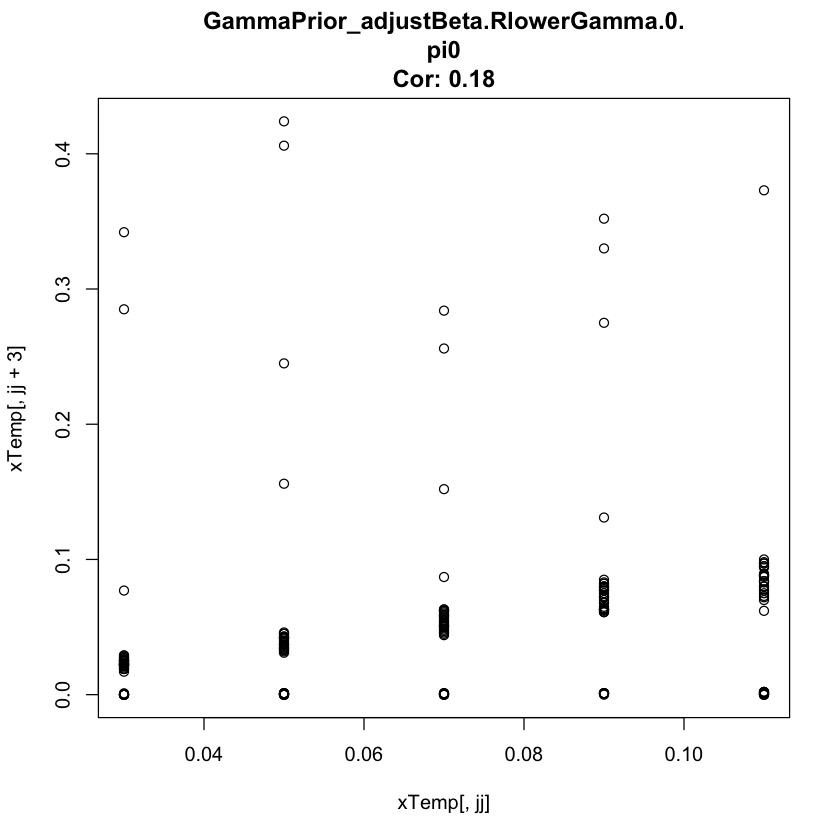

NULL


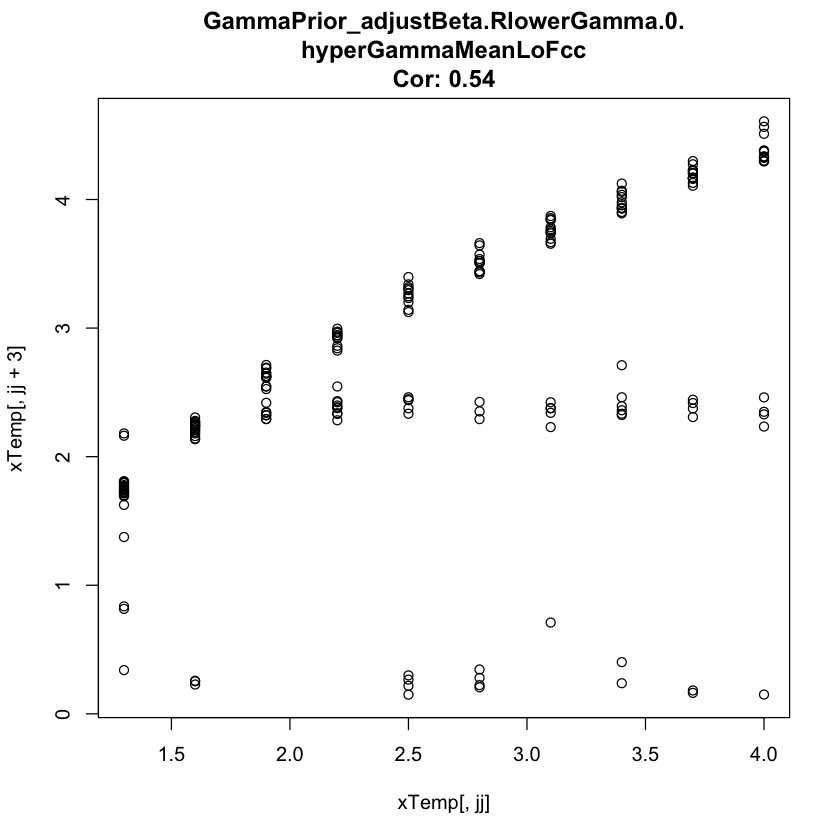

NULL


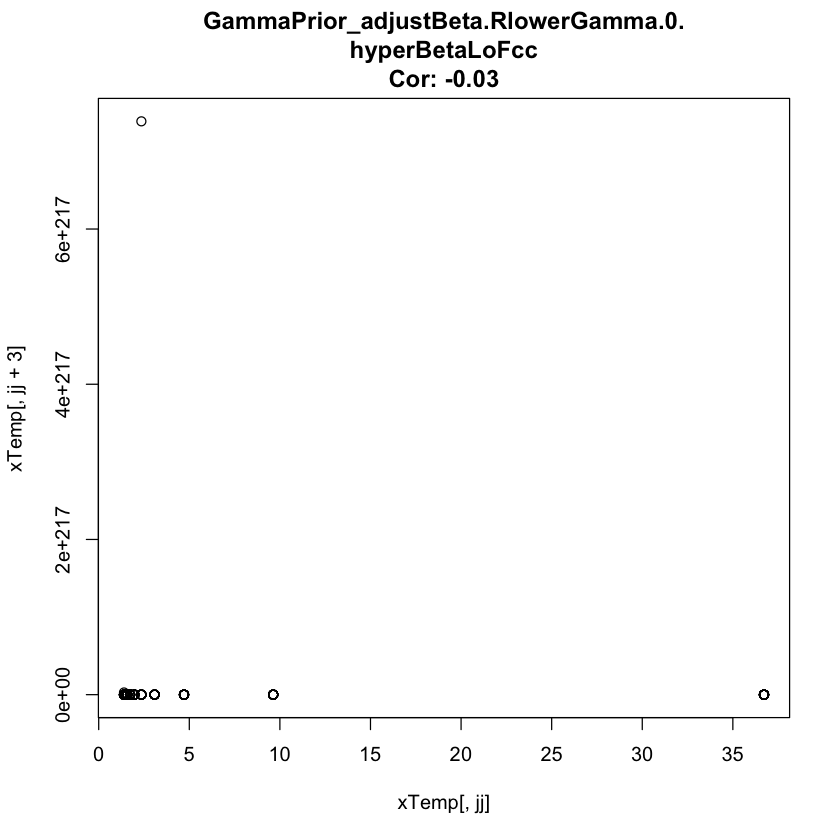

NULL


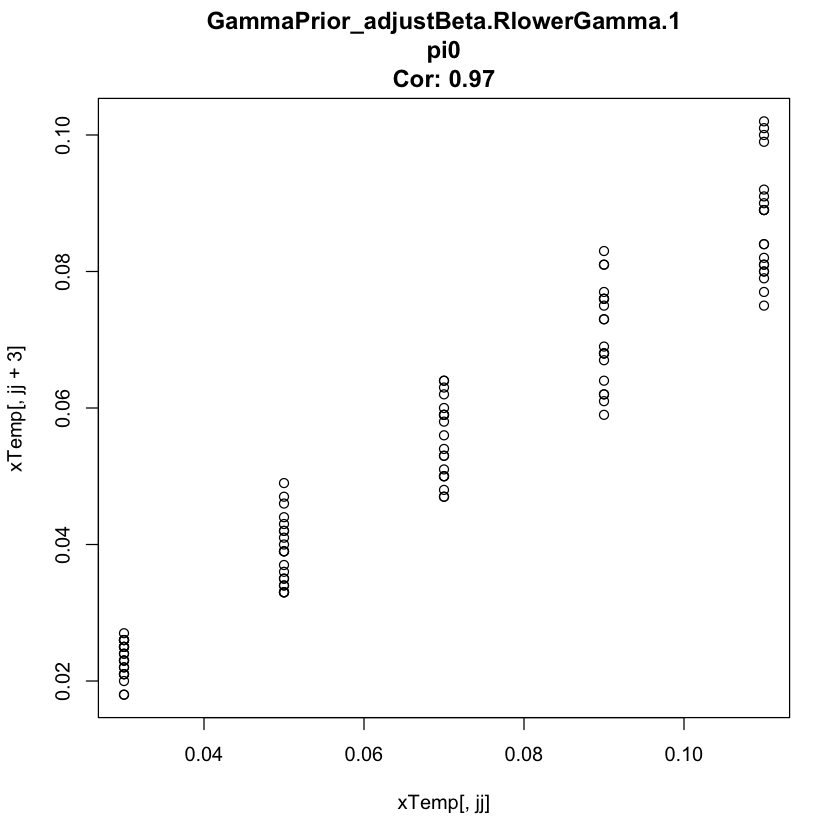

NULL


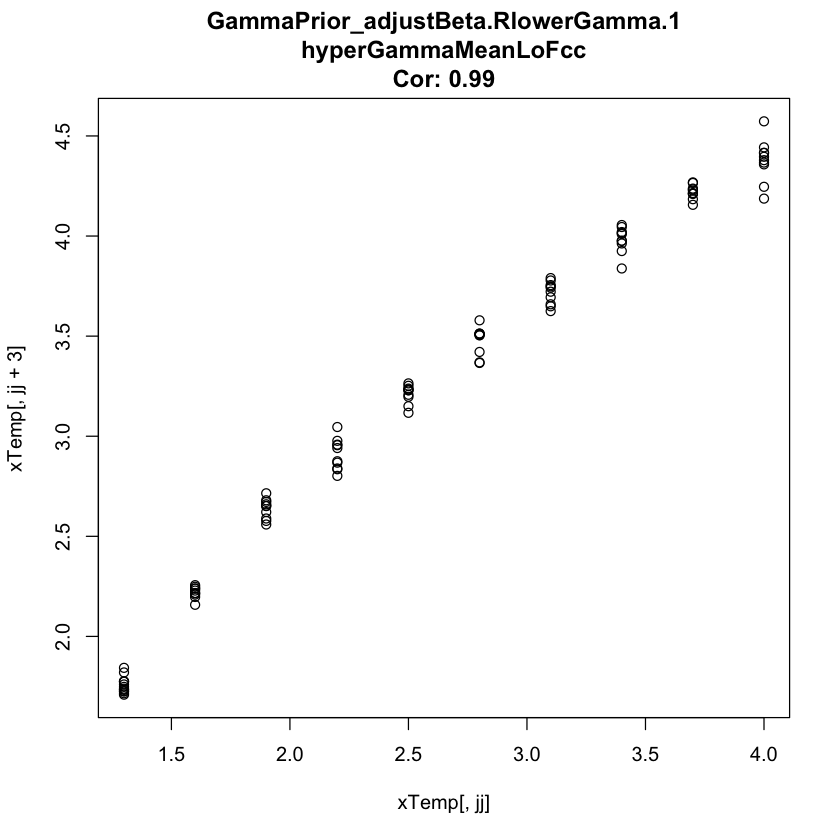

NULL


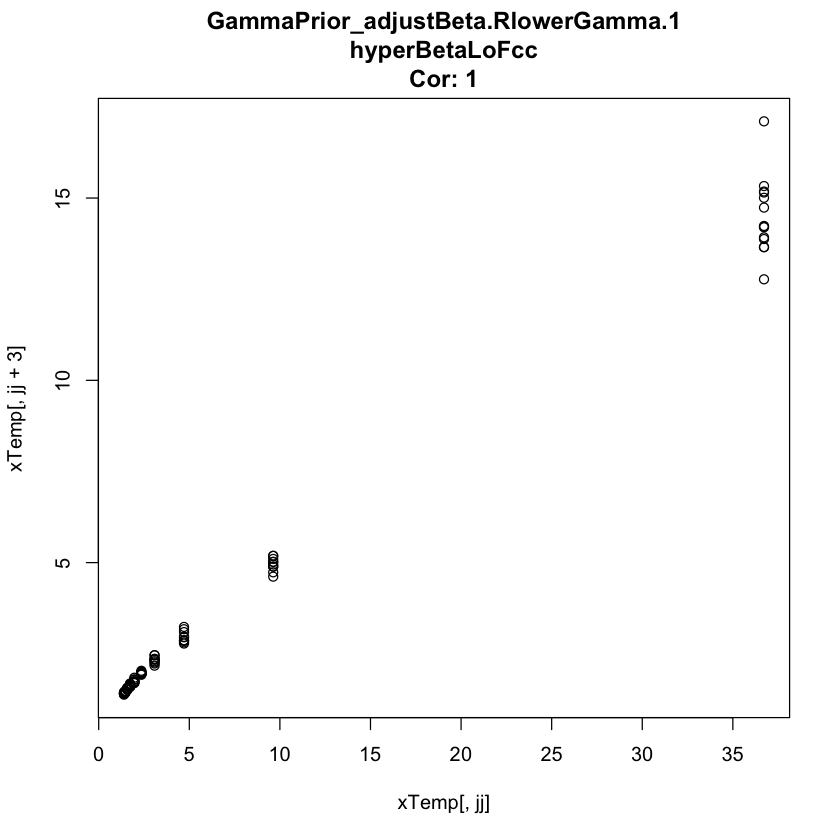

NULL


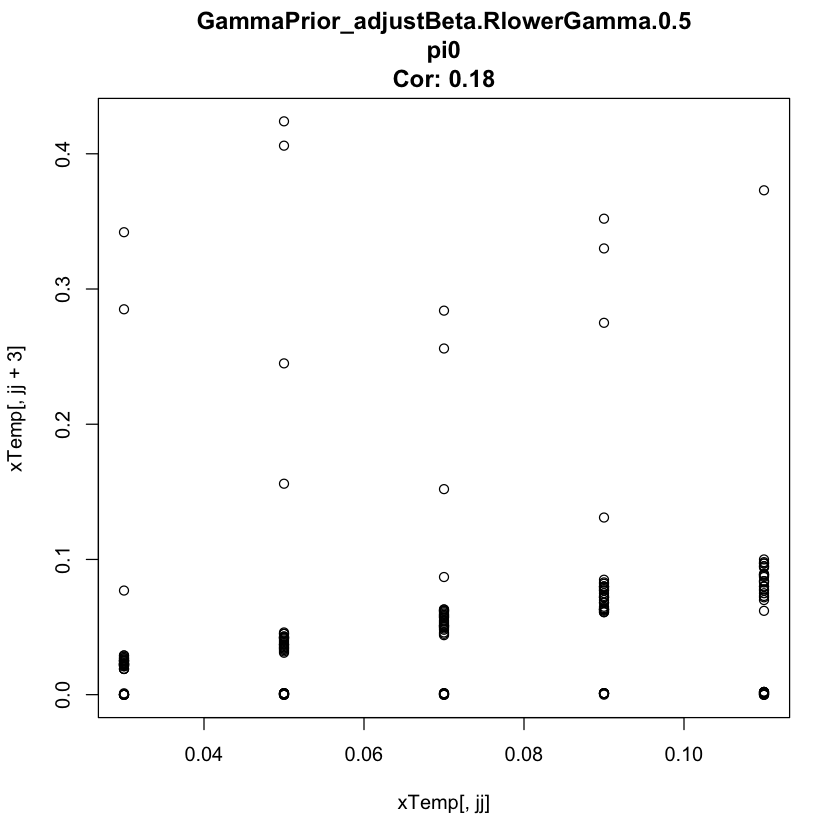

NULL


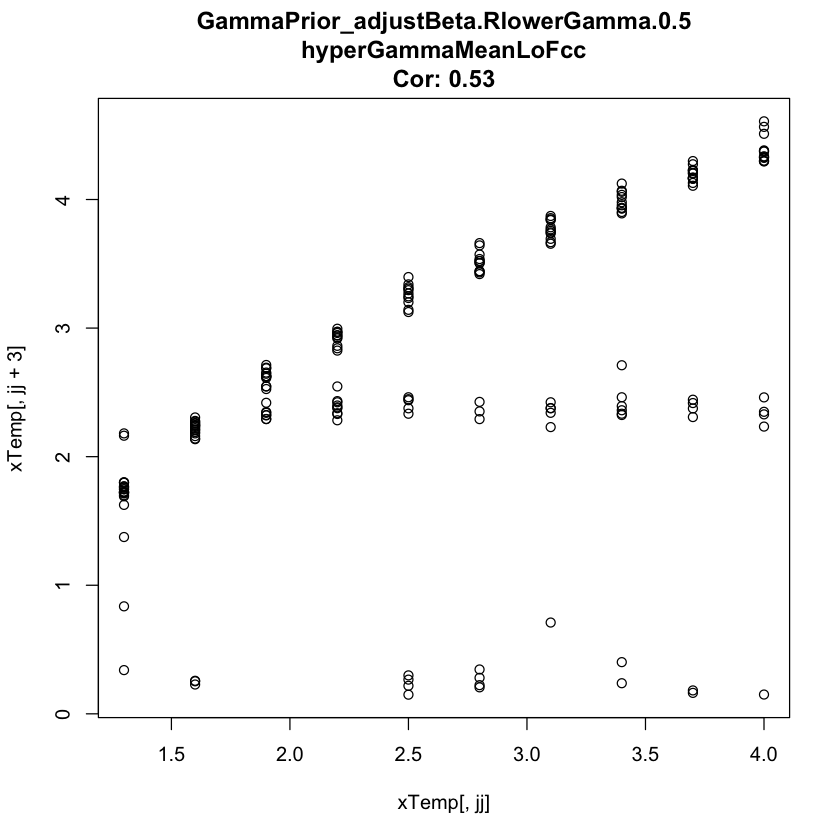

NULL


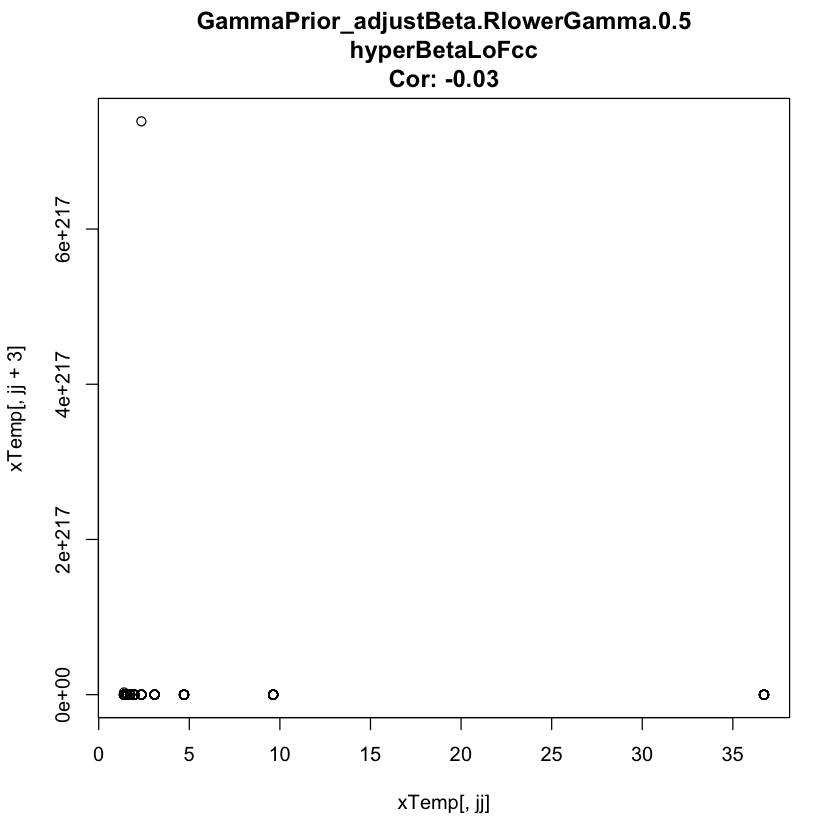

NULL


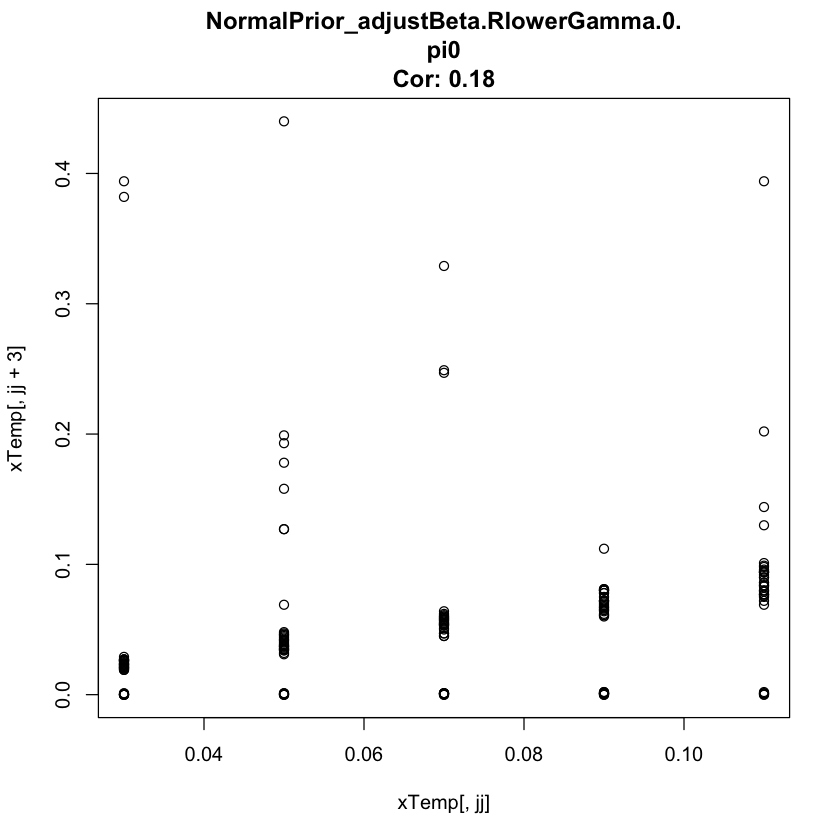

NULL


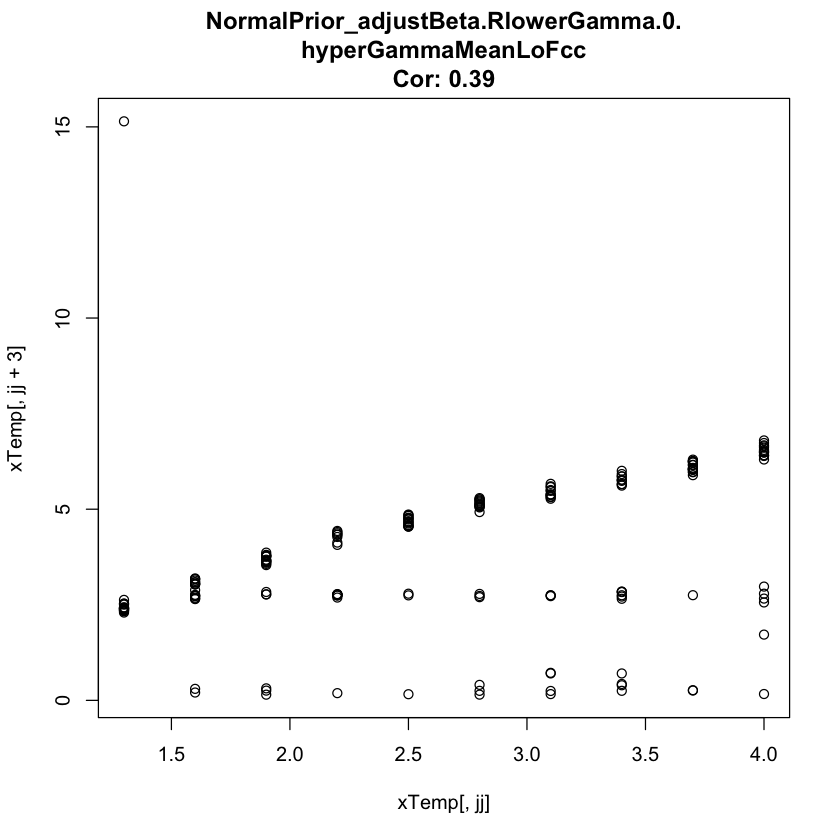

NULL


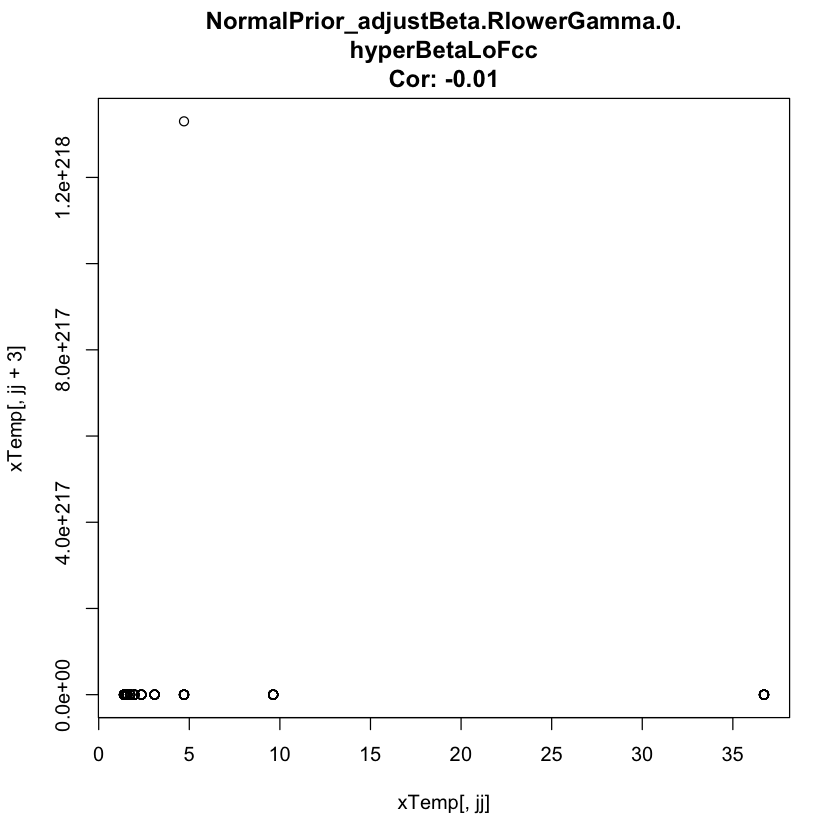

NULL


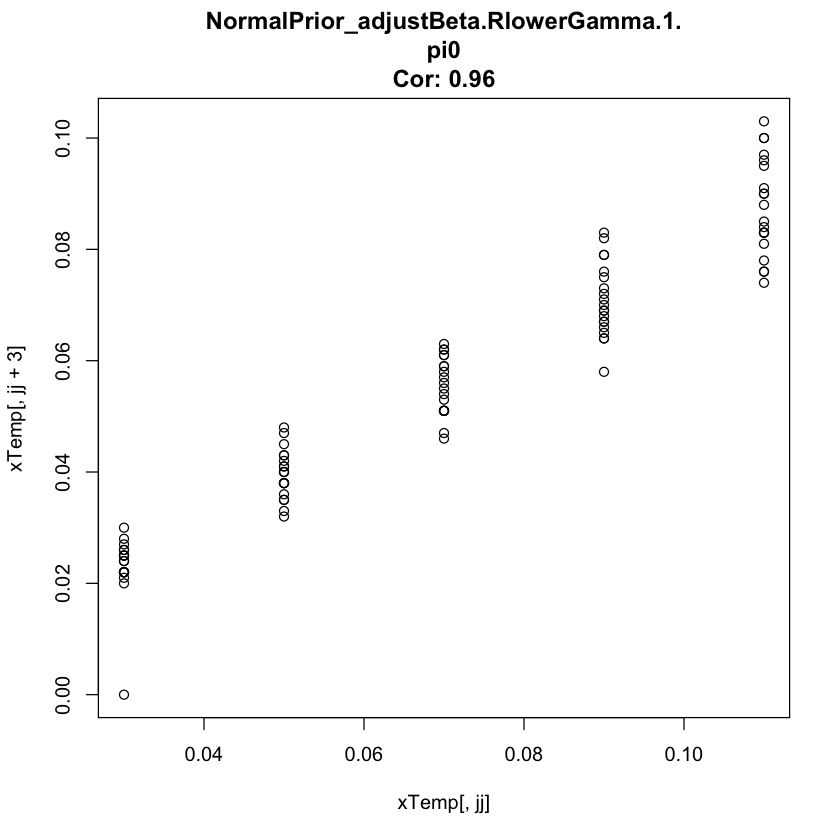

NULL


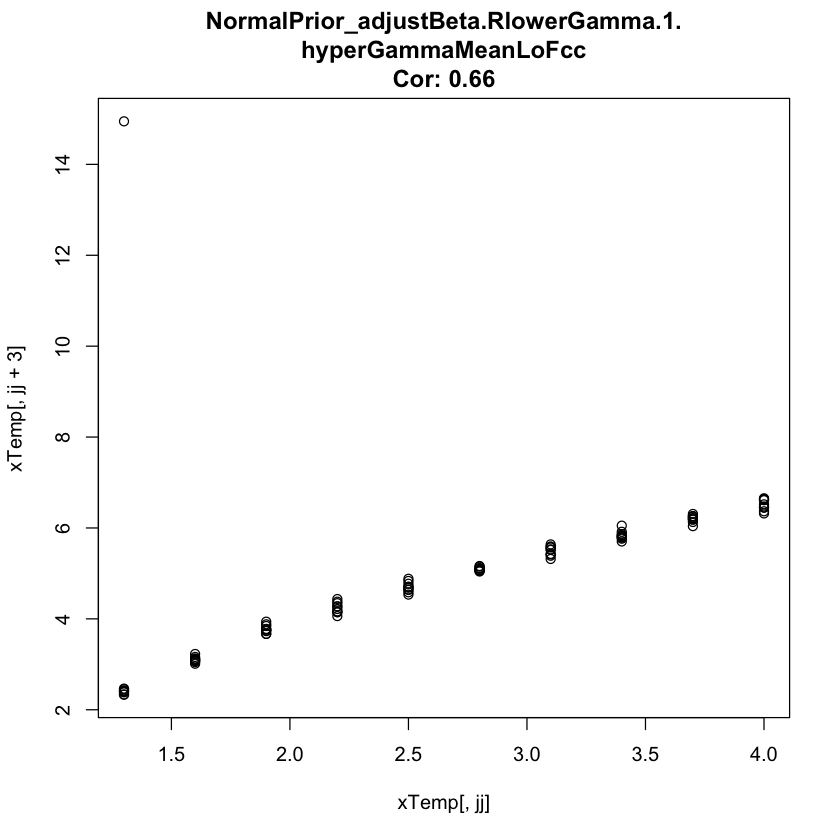

NULL


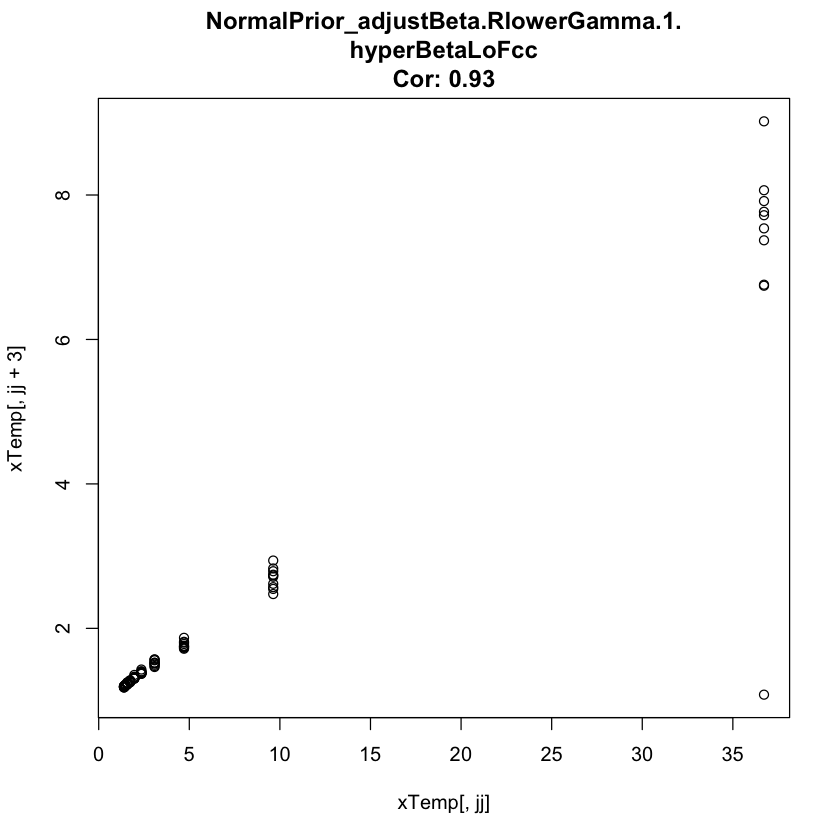

NULL


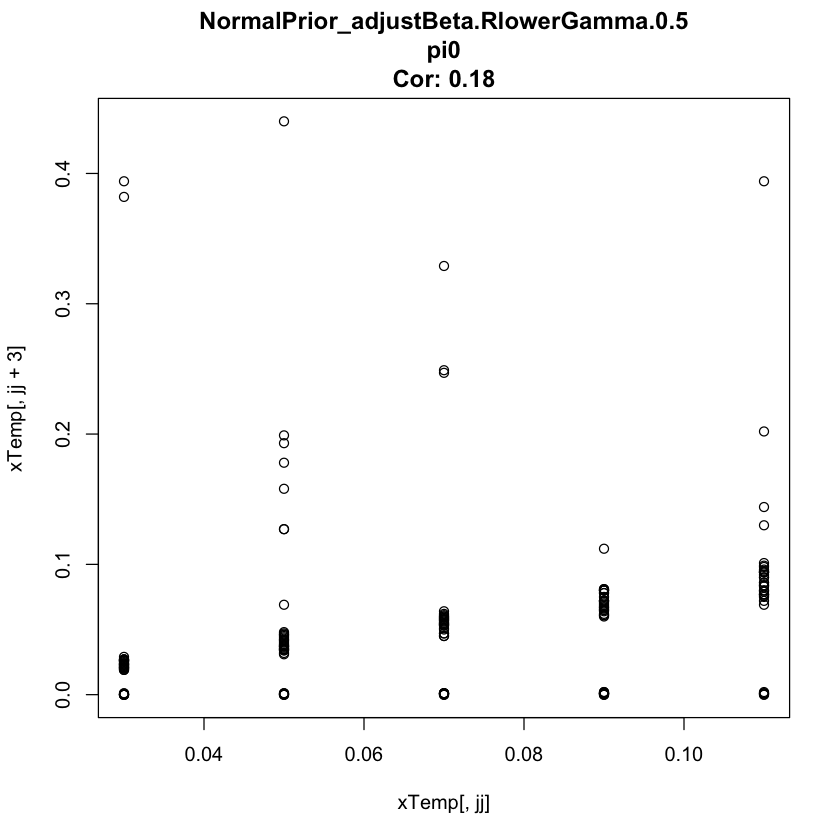

NULL


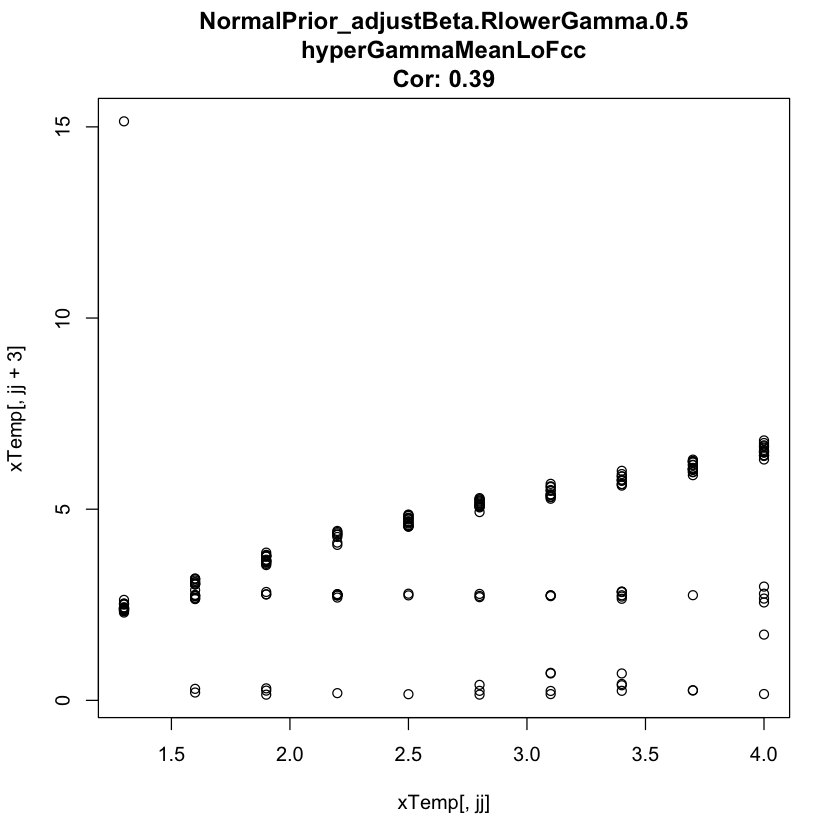

NULL


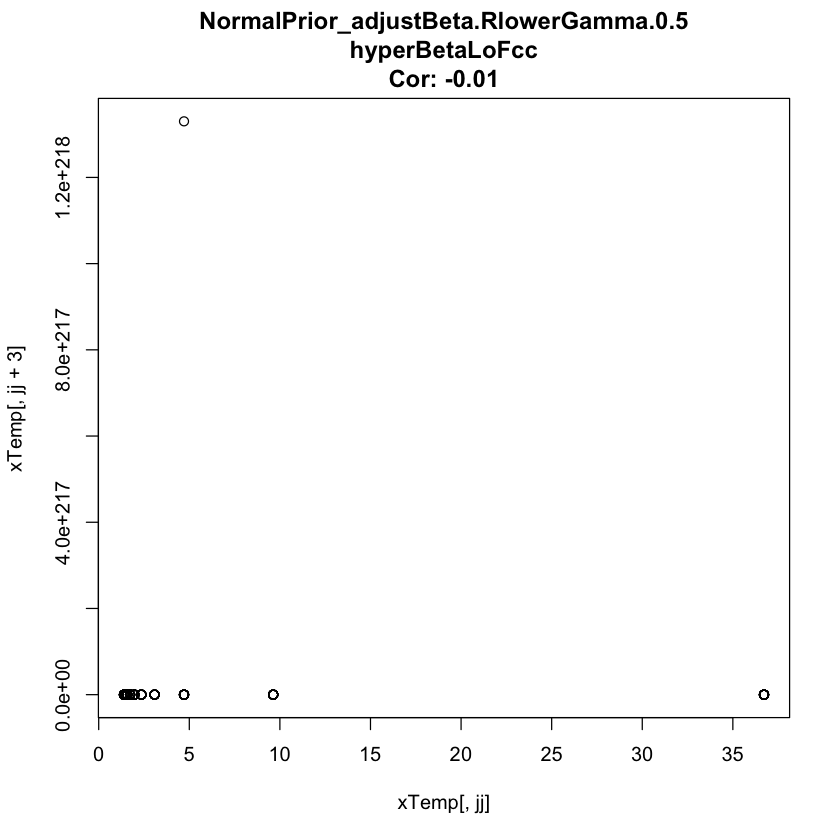

In [39]:
for (ii in 1:length(allOutData1)) {
    xTemp <- allOutData1[[ii]]
    for (jj in 1:3)
    print(plot(xTemp[, jj], xTemp[, jj + 3], 
              main = paste0(tName[ii], "\n",colnames(xTemp)[jj + 3], "\nCor: ",
                           round(cor(xTemp[, jj], xTemp[, jj + 3]), 2))))
}
#lapply(allOutData1, function(x){
 #   for (jj in 1:3)
  #      print(plot(x[, jj], x[, jj +3], 
   #                main = pcolnames(x)[jj + 3]))
#})

In [40]:
tName

[1] "GammaPrior_adjustBeta.RlowerGamma.0."  
[2] "GammaPrior_adjustBeta.RlowerGamma.1"   
[3] "GammaPrior_adjustBeta.RlowerGamma.0.5" 
[4] "NormalPrior_adjustBeta.RlowerGamma.0." 
[5] "NormalPrior_adjustBeta.RlowerGamma.1." 
[6] "NormalPrior_adjustBeta.RlowerGamma.0.5"

In [49]:
dim(outTableA)
colnames(outTableA) <- c("Prior", "Pcor", "RRcor", "BetaCor", "AdjustBeta(Yes/No)")
outTableA[, 1] <- gsub(".Rl", "L", outTableA[, 1])
outTableA[, 1] <- gsub("_adjustBeta", "", outTableA[, 1])
outTableA[, 2:4] <- apply(outTableA[, 2:4], 2, function(x)
    ifelse(!is.na(x), round(as.numeric(x), 2), x))
outTableA
    write.table(outTableA, "Table_result_simulationCaseControl_Only.txt",
           quote = FALSE, row.names  = FALSE)


[1] 12  5

Prior                       Pcor   RRcor  BetaCor AdjustBeta(Yes/No)
tempCor "GammaPriorLowerGamma.0."   "0.18" "0.54" "-0.03" "1"               
tempCor "GammaPriorLowerGamma.1"    "0.97" "0.99" "1"     "1"               
tempCor "GammaPriorLowerGamma.0.5"  "0.18" "0.53" "-0.03" "1"               
tempCor "NormalPriorLowerGamma.0."  "0.18" "0.39" "-0.01" "1"               
tempCor "NormalPriorLowerGamma.1."  "0.96" "0.66" "0.93"  "1"               
tempCor "NormalPriorLowerGamma.0.5" "0.18" "0.39" "-0.01" "1"               
tempCor "GammaPriorLowerGamma.0."   "0.46" "0.59" NA      "0"               
tempCor "GammaPriorLowerGamma.1"    "0.83" "0.99" NA      "0"               
tempCor "GammaPriorLowerGamma.0.5"  "0.65" "0.83" NA      "0"               
tempCor "NormalPriorLowerGamma.0."  "0.46" "0.66" NA      "0"               
tempCor "NormalPriorLowerGamma.1."  "0.81" "0.99" NA      "0"               
tempCor "NormalPriorLowerGamma.0.5" "0.56" "0.79" NA      "0"

In [44]:
str(gsub)

function (pattern, replacement, x, ignore.case = FALSE, perl = FALSE, fixed = FALSE, 
    useBytes = FALSE)  


In [21]:
dirFile <- "/Users/hoang/Documents/SaveDataFromServer/SimulatedData/TestOutDataCCadjustBeta/"

fileN0 <- dir(dirFile, "RData$")

library("coda"); library("rstan")
kk = 1

fileN0 <- fileN0[grep("Jun_10_2016", fileN0)]
fileN0 <- fileN0[grep("lowerGamma.1", fileN0)]
head(fileN0)

[1] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseNormalPrior_adjustBeta.R10.lowerGamma.1.5000.11_56_Jun_10_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.03.rhocC.0.114706.RData" 
[2] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseNormalPrior_adjustBeta.R10.lowerGamma.1.5000.11_56_Jun_10_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.03.rhocC.0.1480891.RData"
[3] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseNormalPrior_adjustBeta.R10.lowerGamma.1.5000.11_56_Jun_10_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.05.rhocC.0.114706.RData" 
[4] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseNormalPrior_adjustBeta.R10.lowerGamma.1.5000.11_56_Jun_10_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.05.rhocC.0.1480891.RData"
[5] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseNormalPrior_adjustBeta.R10.lowerGamma.1.5000.11_56_Jun_10_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.07.rhocC.0.114706.RData" 
[6] "produceSimulatedDataCaseControl_June2016_UseTheSameBeta_UseNormalPrior_adjustBeta.R10.lowerGamma.1.5000.11_56_Jun_10_2016.ntrio.1024.gammaMeanDN.1.3.pi0.0.07.rhocC.0.1480891.RData"

In [22]:
tName <- c("UseNormalPrior_adjustBeta.R3", "UseNormalPrior_adjustBeta.R5", "UseNormalPrior_adjustBeta.R10")
allOutData <- NULL

outTable <- NULL

for (tt in tName){
    fileN <- fileN0[grep(tt, fileN0)]
    outData <- NULL
    NN <- length(fileN)
#NN <- 50
for (kk in 1:NN) {
load(paste0(dirFile, fileN[kk]))
b1 <- as.data.frame( testFitSingleCC)
bMCMC <- mcmc(b1)
bHPD <-  HPDinterval(bMCMC)
medianHPD <- NULL

for (ii in 1:dim(bHPD)[1]){
        t1 <- b1[, ii]
            t2 <- t1[(t1>=bHPD[ii, 1]) & (t1<=bHPD[ii, 2])]
            medianHPD[ii] <- mean(t2)
}
names(medianHPD) <- colnames(b1)
outData <- rbind(outData, c(pi0, gammaMean, betaCC, medianHPD))
}

    tempCor <- tt
    for (i1 in 1:3) 
        tempCor <- c(tempCor, cor(outData[, i1], outData[, i1 + 3]))
        outTable <- rbind(outTable, tempCor)

    allOutData[[tt]] <- outData
    }

for (j1 in 1:3)
 print(cor(outData[, j1], outData[, j1 + 3]))


[1] 0.9391913
[1] 0.6738665
[1] 0.8602915


In [23]:
head(allOutData[[1]])

pi0 hyperGammaMeanLoFcc hyperBetaLoFcc      lp__
[1,] 0.03 1.3 86.34052 0.02225091            1.678685       35.85158  -2634261
[2,] 0.03 1.3 86.34052 0.02416353            1.719326       37.35425 -12948602
[3,] 0.05 1.3 86.34052 0.03870939            1.713761       36.64030  -2577100
[4,] 0.05 1.3 86.34052 0.03899730            1.631167       42.46462 -12759057
[5,] 0.07 1.3 86.34052 0.05474986            1.670935       39.11028  -2547344
[6,] 0.07 1.3 86.34052 0.05756513            1.594608       43.75131 -12490381

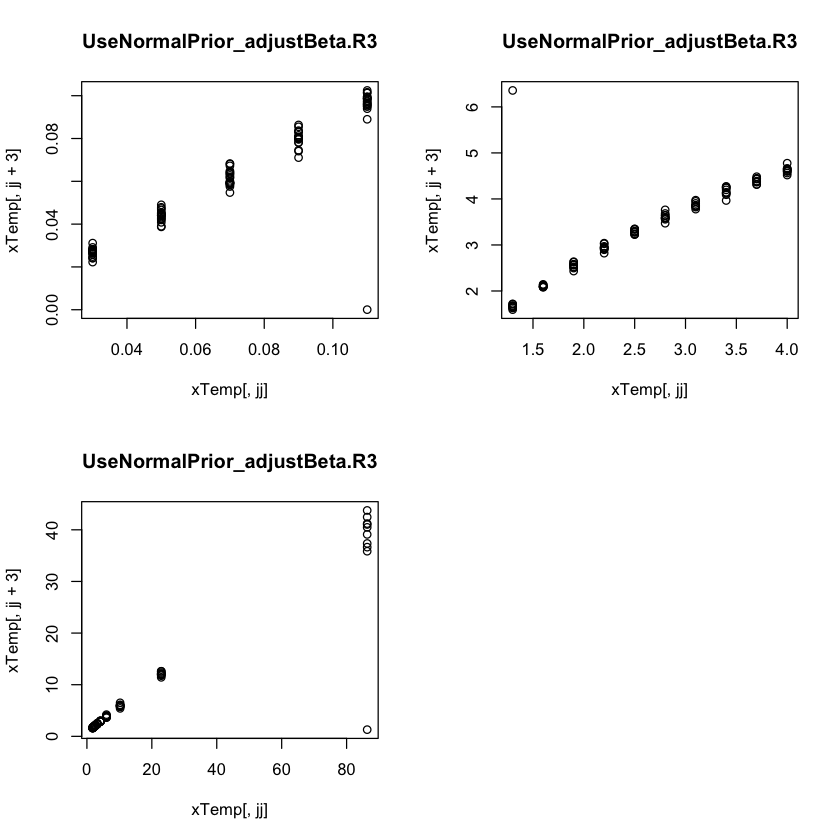

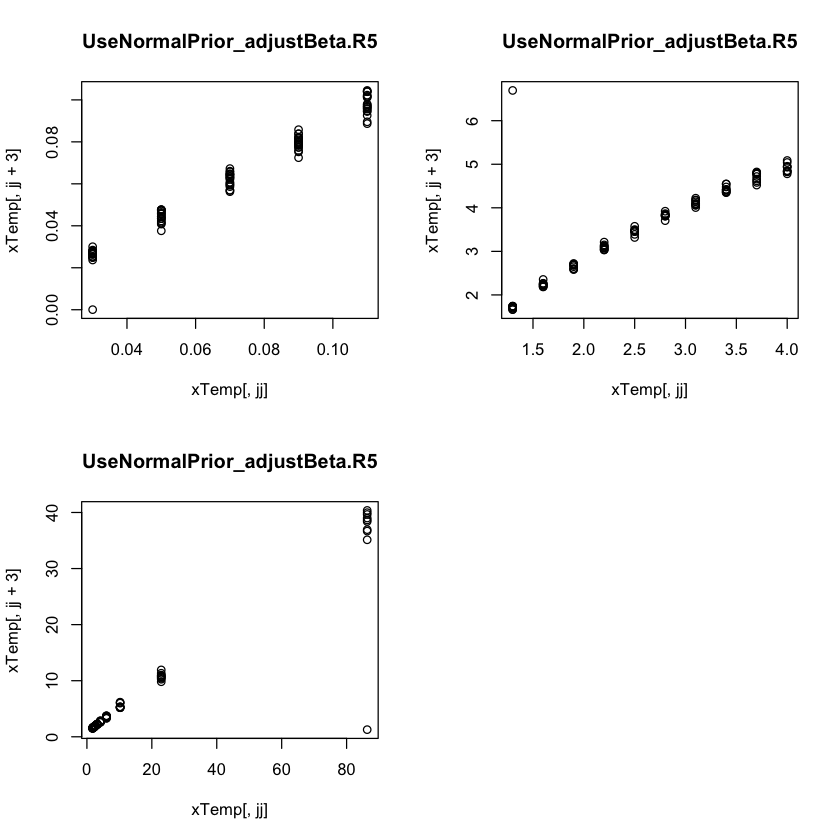

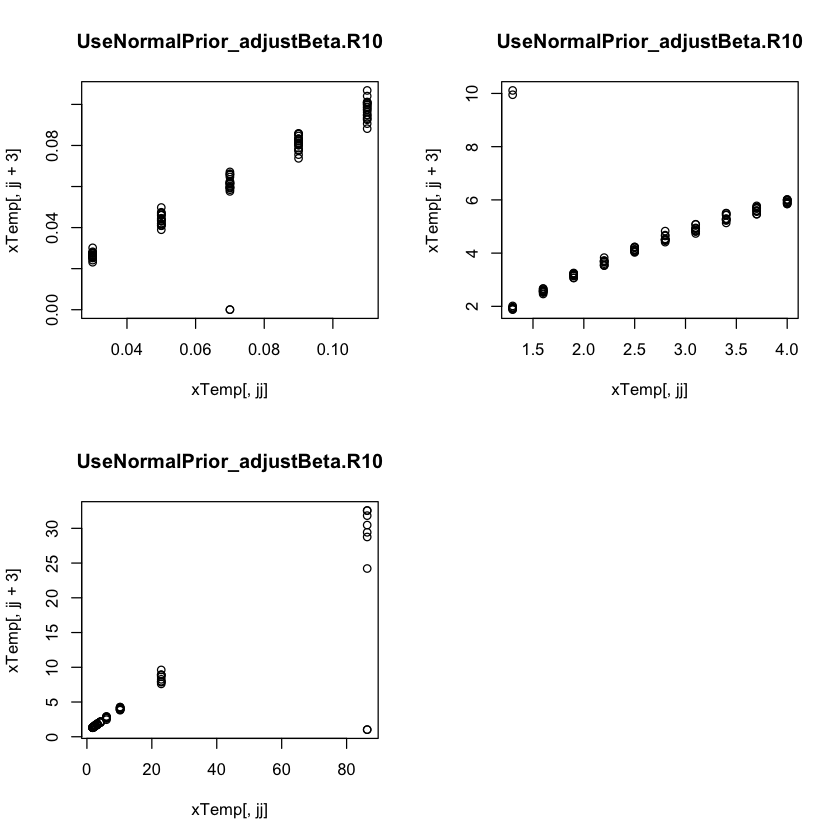

In [24]:
for (kk in 1:3){
xTemp <- allOutData[[kk]]

par(mfrow = c(2, 2))
for (jj in 1:3)
    plot(xTemp[, jj], xTemp[, jj + 3], main = tName[kk])
    }
 

In [25]:
  lowerGamma

[1] 1

In [26]:
outTable1 <- outTable
#outTable0 <- cbind(outTable0, rep(0, dim(outTable0)[1]))
#outTable1 <- cbind(outTable1, rep(1, dim(outTable1)[1]))
#outTableA <- rbind(outTable1, outTable0)

#write.table(outTableA, "Table_result_simulationCaseControl_Only.txt",
 #          quote = FALSE, row.names  = FALSE)

outTable1

[,1]                            [,2]                [,3]               
tempCor "UseNormalPrior_adjustBeta.R3"  "0.920493447206854" "0.883288757973725"
tempCor "UseNormalPrior_adjustBeta.R5"  "0.987254977327905" "0.887453111433644"
tempCor "UseNormalPrior_adjustBeta.R10" "0.939191332332545" "0.673866452722805"
        [,4]               
tempCor "0.936407717407609"
tempCor "0.938494236599005"
tempCor "0.860291488938672"

In [27]:
outTableA <- outTable1
dim(outTableA)
colnames(outTableA) <- c("Prior", "Pcor", "RRcor", "BetaCor", "AdjustBeta(Yes/No)")
outTableA[, 1] <- gsub(".Rl", "L", outTableA[, 1])
outTableA[, 1] <- gsub("_adjustBeta", "", outTableA[, 1])
outTableA[, 2:4] <- apply(outTableA[, 2:4], 2, function(x)
    ifelse(!is.na(x), round(as.numeric(x), 2), x))
outTableA

[1] 3 4

ERROR: Error in `colnames<-`(`*tmp*`, value = c("Prior", "Pcor", "RRcor", "BetaCor", : length of 'dimnames' [2] not equal to array extent


[,1]                 [,2]   [,3]   [,4]  
tempCor "UseNormalPrior.R3"  "0.92" "0.88" "0.94"
tempCor "UseNormalPrior.R5"  "0.99" "0.89" "0.94"
tempCor "UseNormalPrior.R10" "0.94" "0.67" "0.86"